In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA EXTRACTION & CLEANING

In [2]:
df=pd.read_csv("covid_19_india.csv")

In [3]:
df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [4]:
df.drop(["ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)
df

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,0,0,3
...,...,...,...,...,...,...,...
16845,16846,2021-07-07,8:00 AM,Telangana,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,1682130,22656,1706818


In [32]:
df["Date"]=pd.to_datetime(df["Date"],format="%Y-%m-%d")
df["Year"]=pd.to_datetime(df["Date"],format="%Y-%m-%d").dt.year
df["Month"]=pd.to_datetime(df["Date"],format="%Y-%m-%d").dt.month
df[["Date","Year","Month"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    16850 non-null  datetime64[ns]
 1   Year    16850 non-null  int64         
 2   Month   16850 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 395.0 KB


In [12]:
#df["Month"]=df["Date"].dt.month_name()

# VISUALIZATION OF EDA

# ACTIVE CASES-STATEWISE

In [33]:
df["Active_cases"]=df["Confirmed"]-(df["Cured"]+df["Deaths"])
df.head()

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Year,Month,Active_cases
0,1,2020-01-30,6:00 PM,Kerala,0,0,1,2020,1,1
1,2,2020-01-31,6:00 PM,Kerala,0,0,1,2020,1,1
2,3,2020-02-01,6:00 PM,Kerala,0,0,2,2020,2,2
3,4,2020-02-02,6:00 PM,Kerala,0,0,3,2020,2,3
4,5,2020-02-03,6:00 PM,Kerala,0,0,3,2020,2,3


In [34]:
statewise=df.groupby("State/UnionTerritory")[["Confirmed","Cured","Deaths","Active_cases"]].sum().reset_index()
statewise_filter=statewise[statewise["State/UnionTerritory"].isin(["Maharashtra","Kerala","Delhi","Odisha","Goa"])]

In [17]:
statewise

,State/UnionTerritory,Confirmed,Cured,Deaths,Active_cases
0,Andaman and Nicobar Islands,1675248,1589935,22624,62689
1,Andhra Pradesh,324146783,303427899,2475816,18243068
2,Arunachal Pradesh,5598324,5150519,19303,428502
3,Assam,80418492,74011348,459575,5947569
4,Bihar,106881540,100131380,756282,5993878
5,Bihar****,1430909,1402468,18881,9560
6,Cases being reassigned to states,345565,0,0,345565
7,Chandigarh,8691806,7980284,119356,592166
8,Chhattisgarh,128751782,117163544,1591126,9997112
9,Dadra and Nagar Haveli,20722,20352,8,362


In [18]:
statewise_filter

,State/UnionTerritory,Confirmed,Cured,Deaths,Active_cases
12,Delhi,236972842,224062704,4066907,8843231
13,Goa,22280065,20224042,338359,1717664
20,Kerala,344319045,311127643,1327754,31863648
24,Maharashtra,908892470,813788907,19314532,75789031
29,Odisha,126408397,117984789,600149,7823459


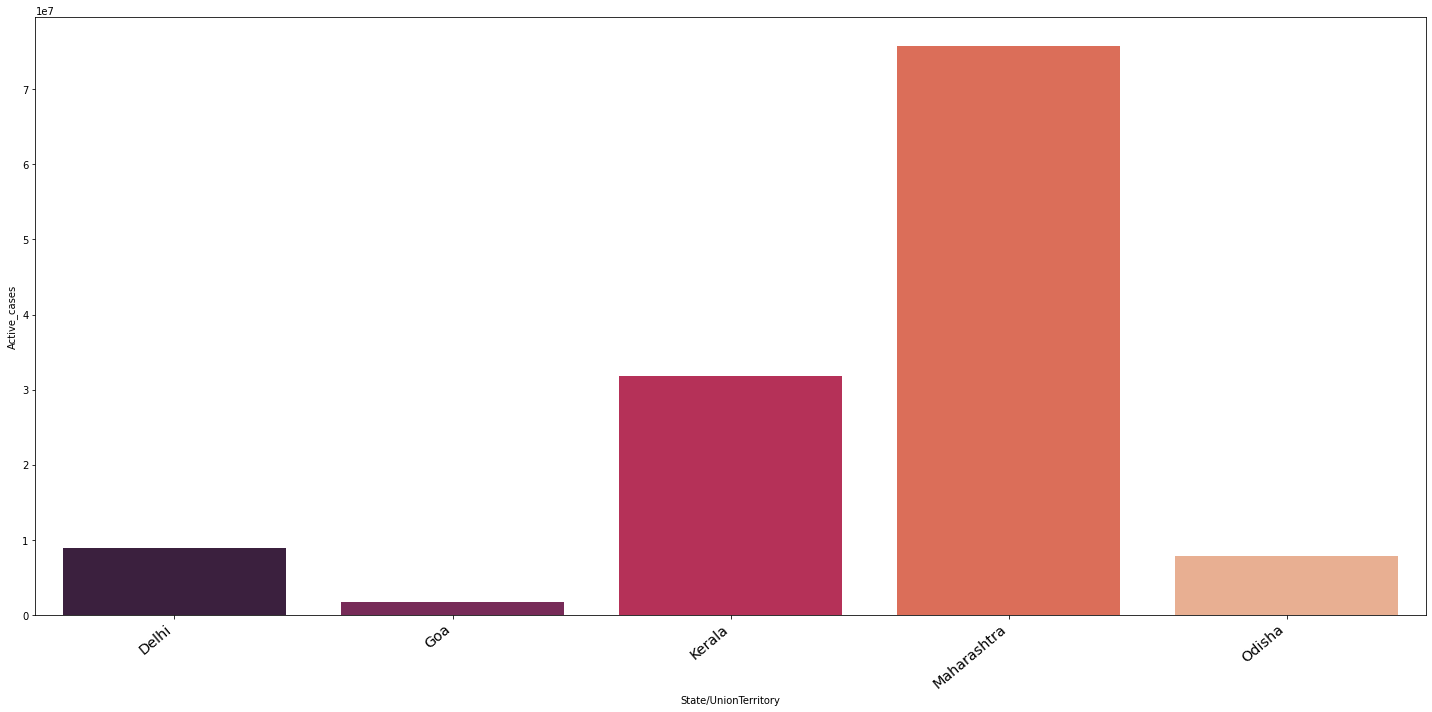

In [70]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="State/UnionTerritory",y="Active_cases",data=statewise_filter,palette="rocket")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

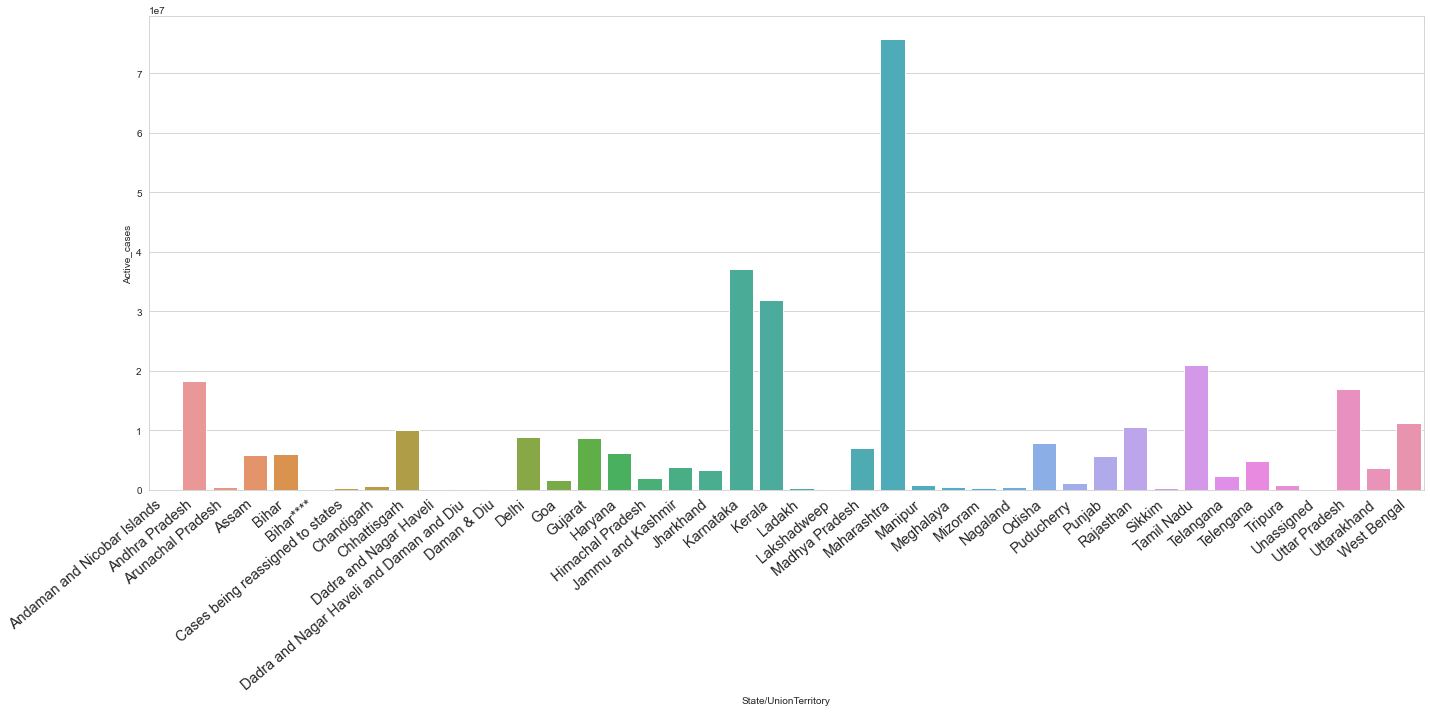

In [25]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="State/UnionTerritory",y="Active_cases",data=statewise)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

# CONFIRMED CASES-STATEWISE

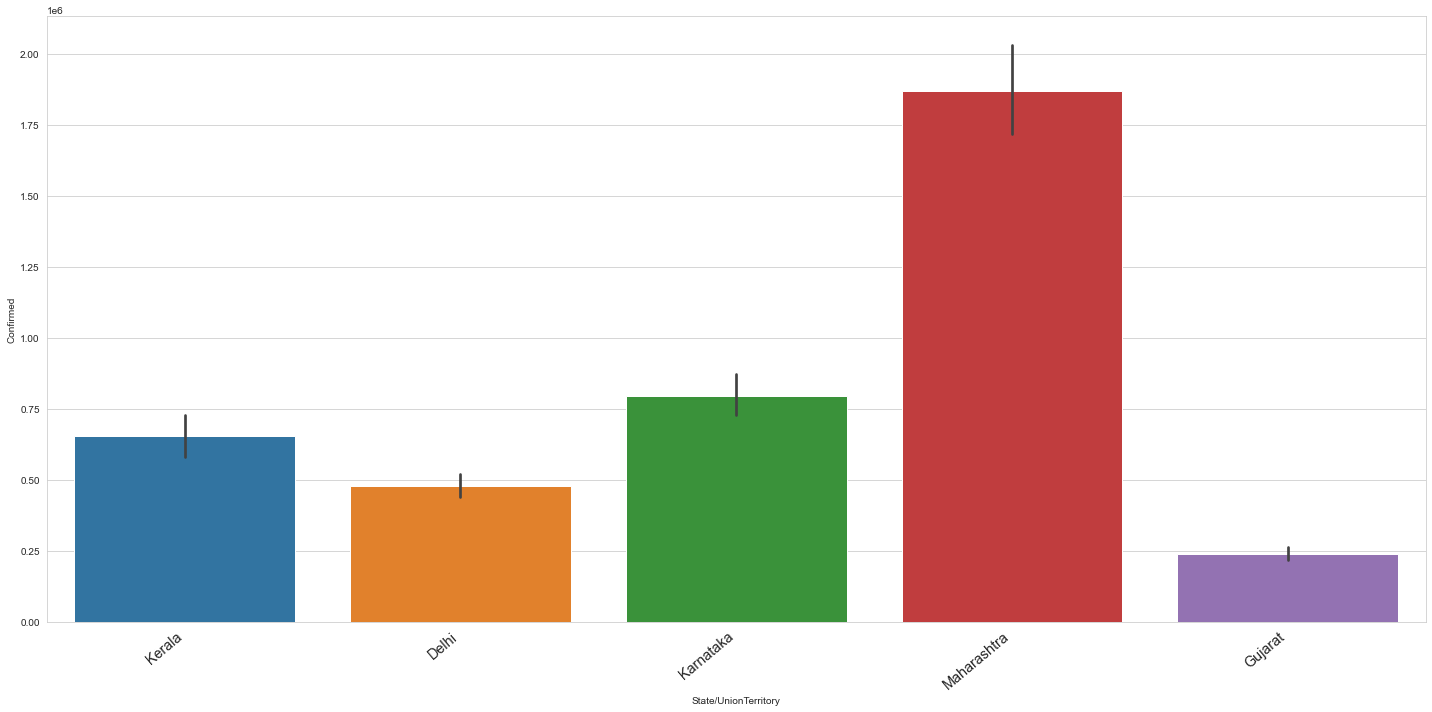

In [26]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="State/UnionTerritory",y="Confirmed",data=df[df["State/UnionTerritory"].isin(["Maharashtra","Kerala","Delhi","Karnataka","Gujarat"])]
            ,palette="tab10")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

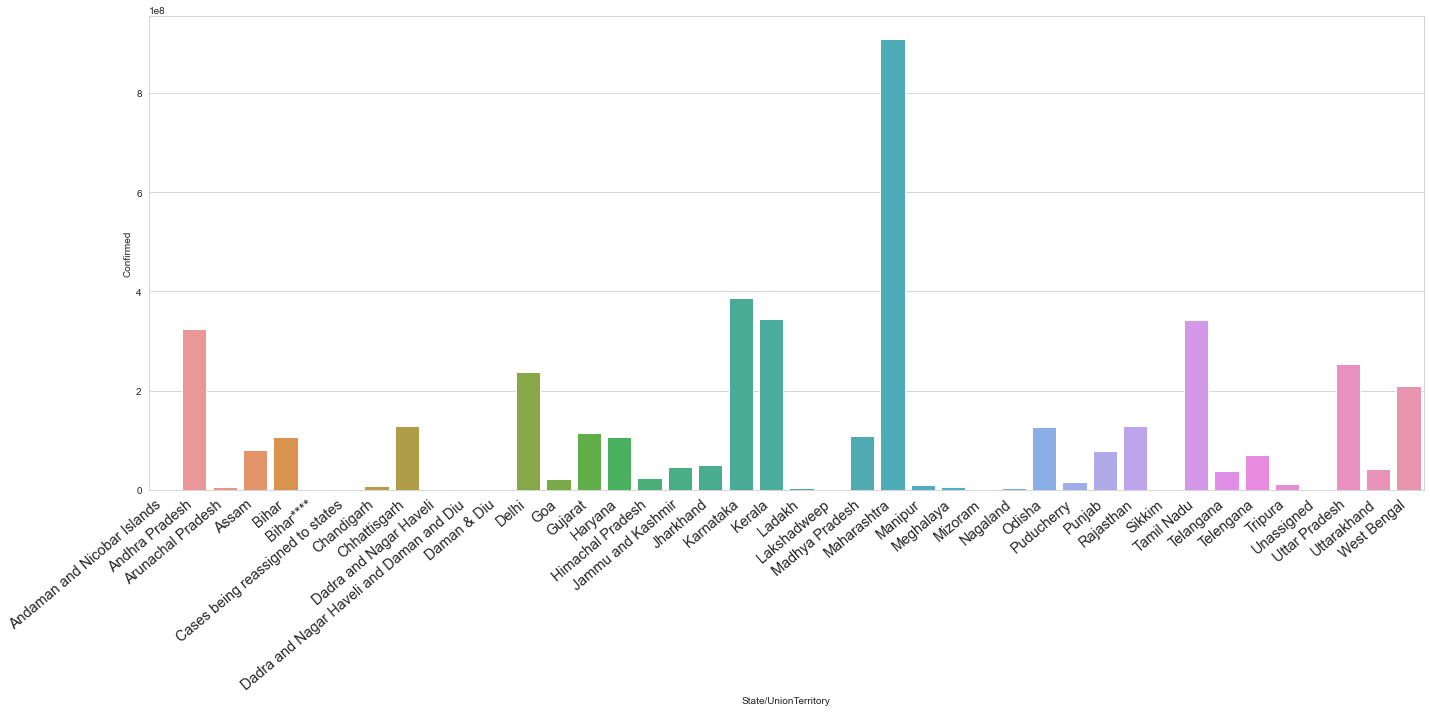

In [33]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="State/UnionTerritory",y="Confirmed",data=statewise)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

# CURED & DEATHS-STATEWISE

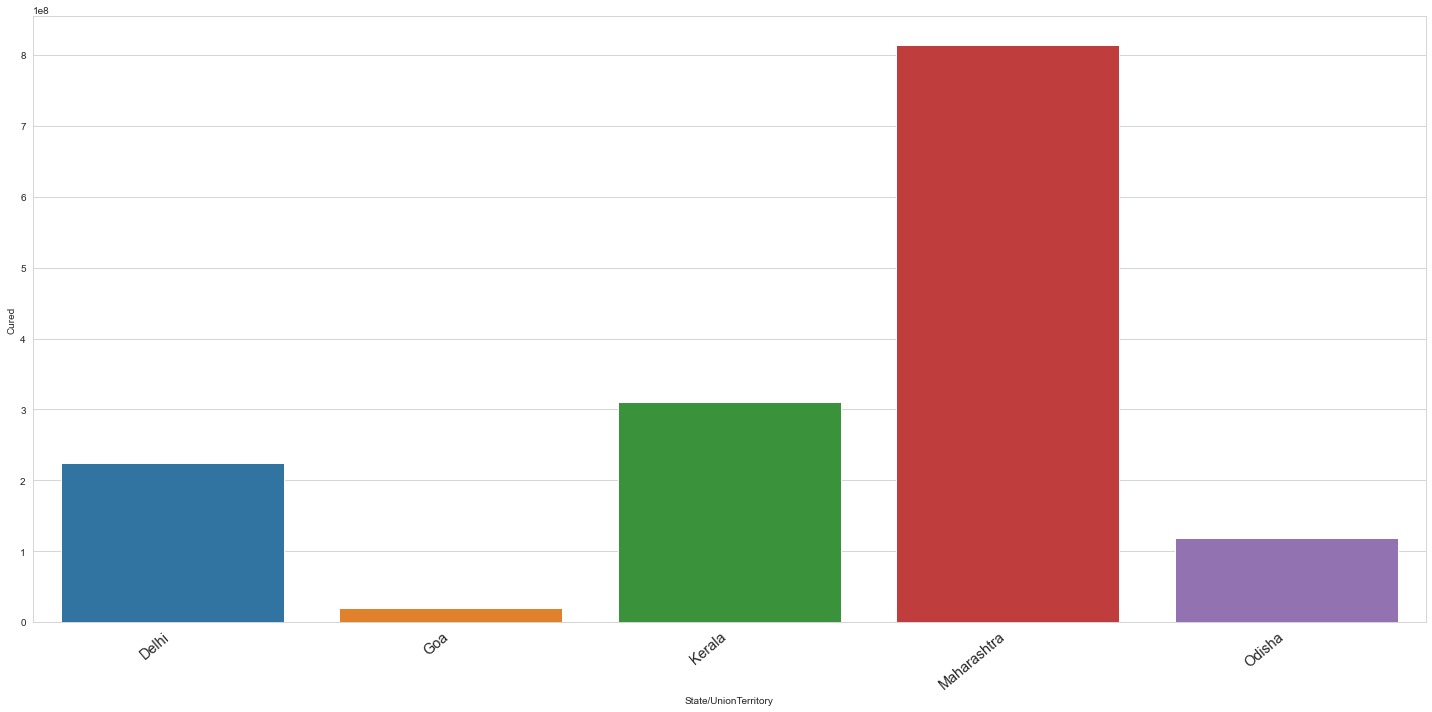

In [29]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="State/UnionTerritory",y="Cured",data=statewise_filter,palette="tab10")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

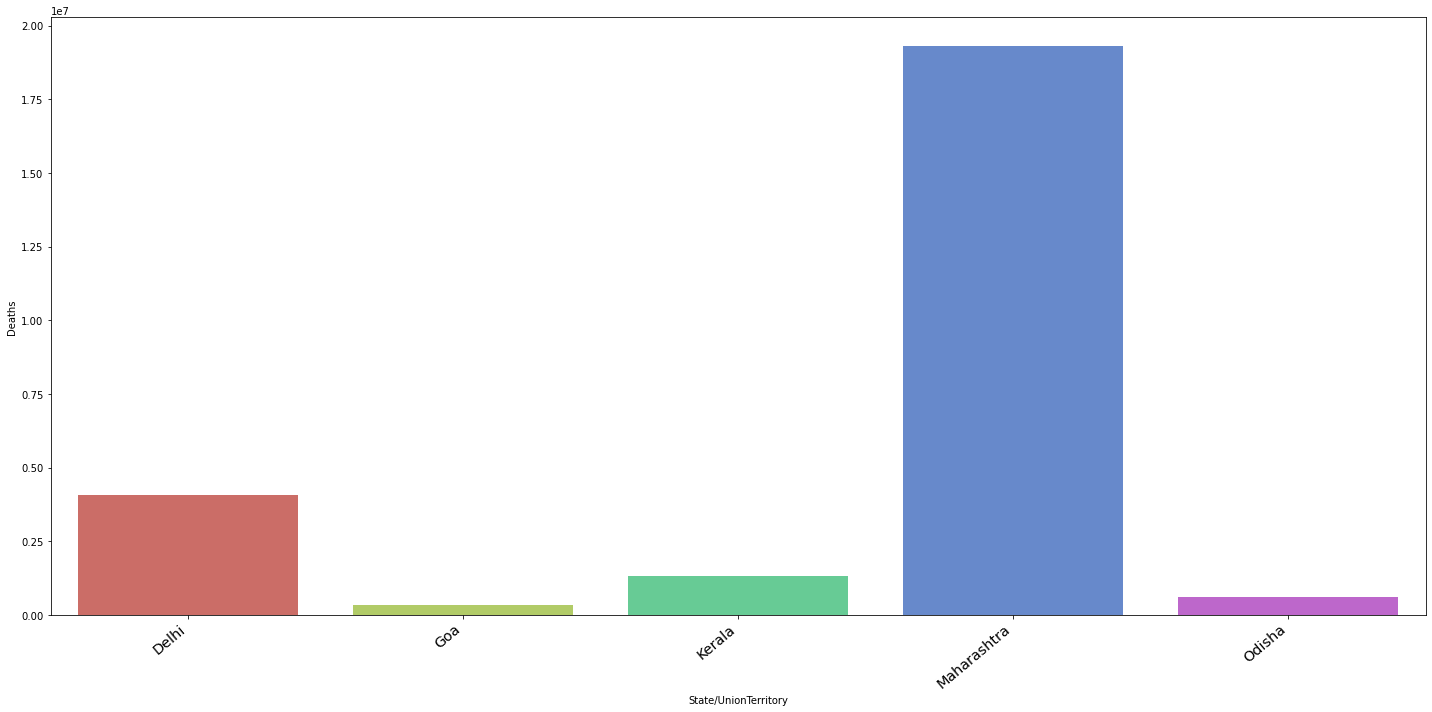

In [71]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="State/UnionTerritory",y="Deaths",data=statewise_filter,palette="hls")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

# YEARS & MONTHS-STATEWISE-ACTIVE/CURED/DEATHS/CON

C:\Users\Shrutika\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Shrutika\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


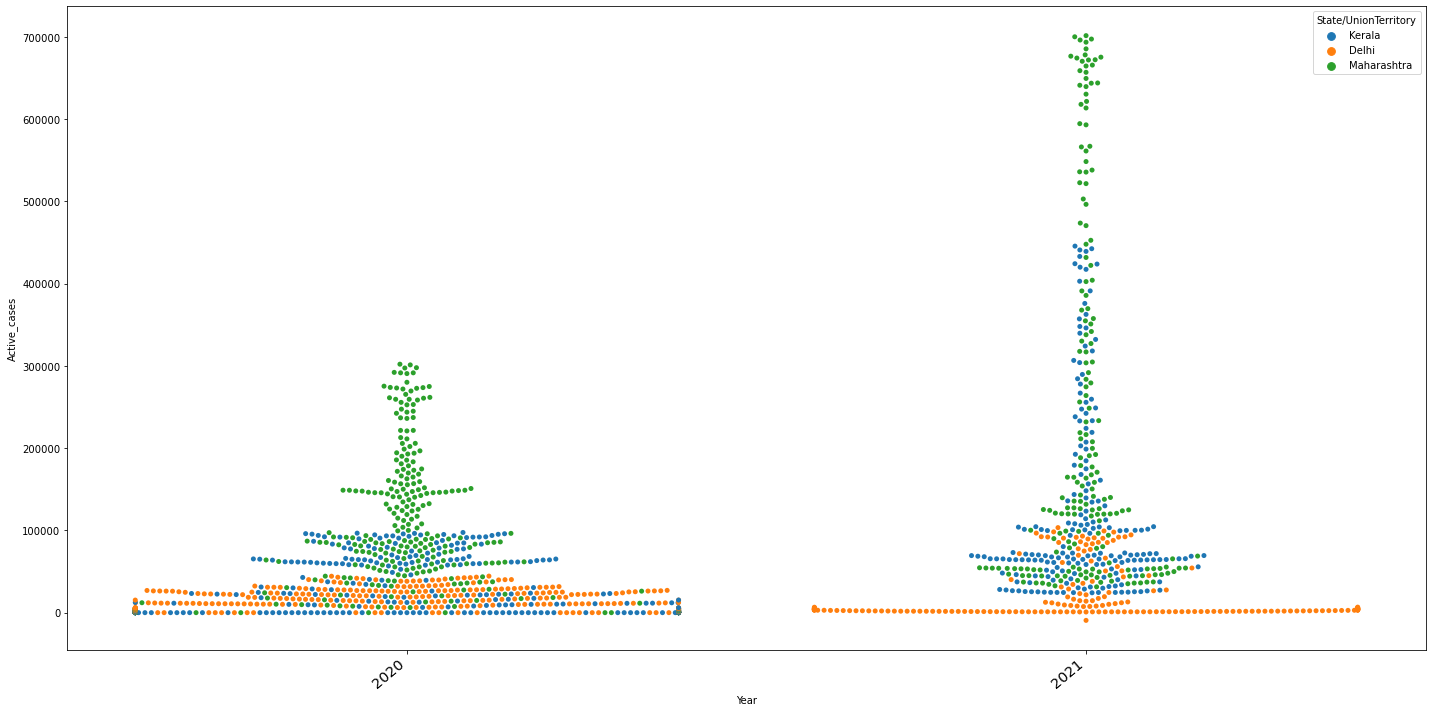

In [90]:
fig=plt.figure(figsize=(20,10))
sns.swarmplot(x="Year",y="Active_cases",data=df[df["State/UnionTerritory"].isin(["Maharashtra","Kerala","Delhi"])]
              ,hue="State/UnionTerritory",palette="tab10")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

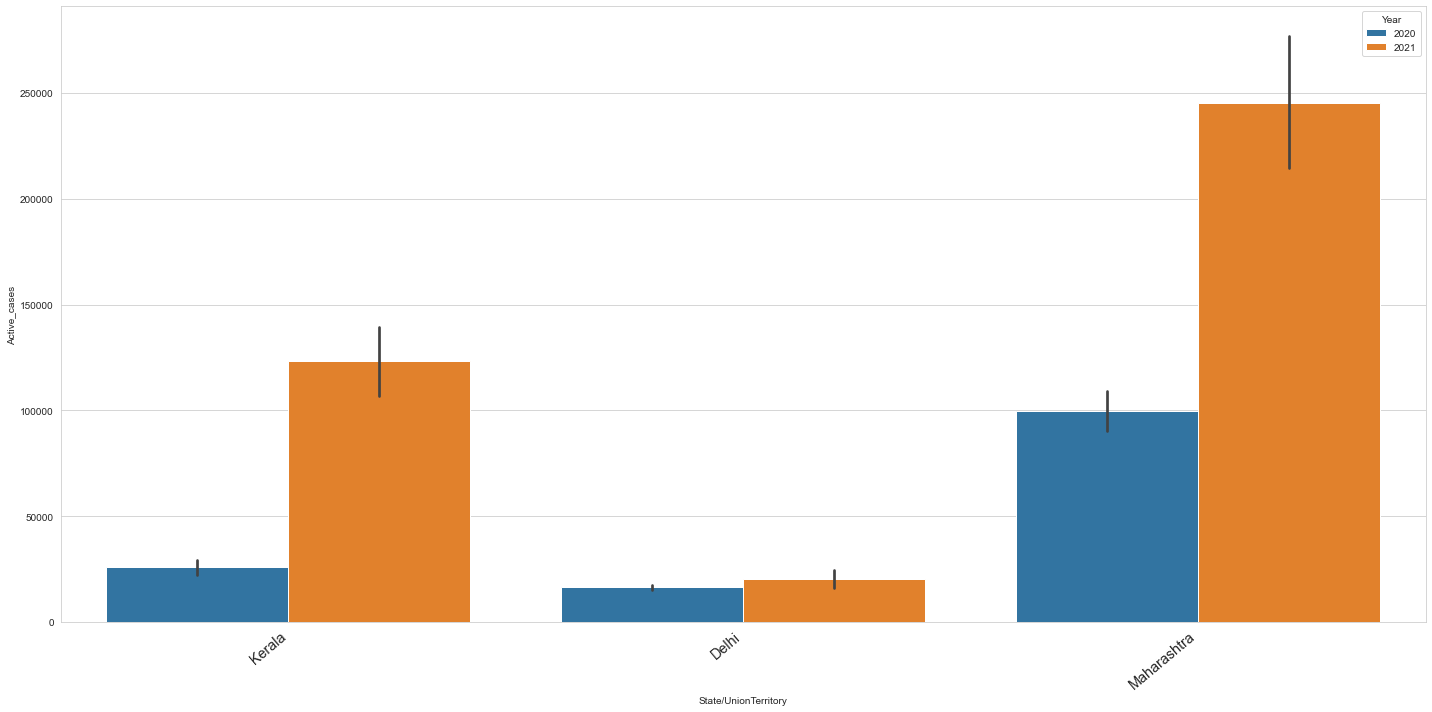

In [31]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x="State/UnionTerritory",y="Active_cases",data=df[df["State/UnionTerritory"].isin(["Maharashtra","Kerala","Delhi"])]
            ,hue="Year",palette="tab10")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

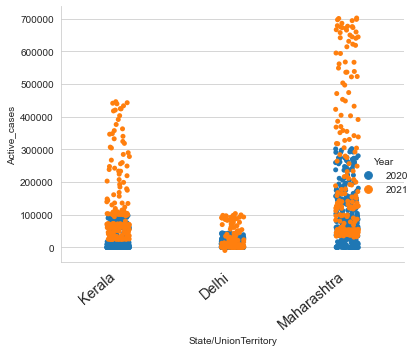

In [32]:
fig=plt.figure(figsize=(20,10))
sns.catplot(x="State/UnionTerritory",y="Active_cases",data=df[df["State/UnionTerritory"].isin(["Maharashtra","Kerala","Delhi"])]
            ,hue="Year",palette="tab10")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

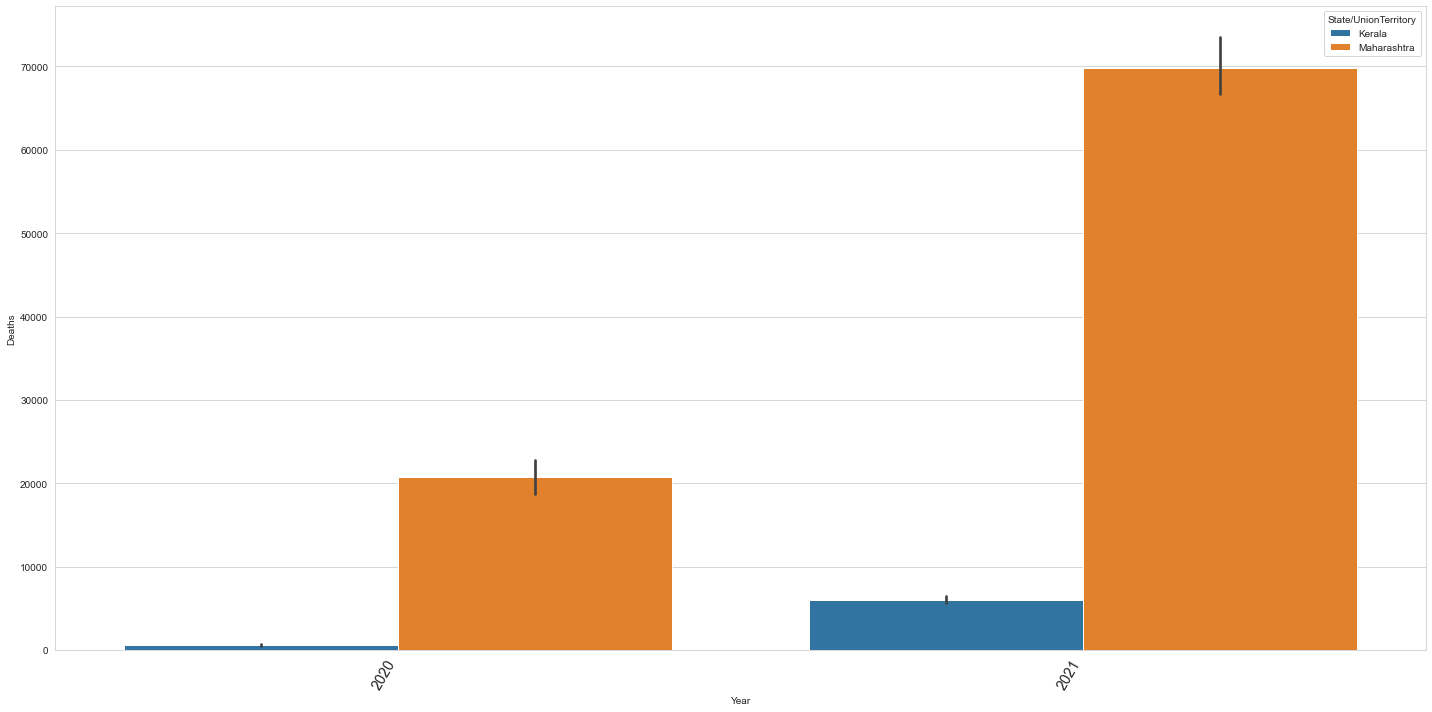

In [65]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")
sns.barplot(data=df[df["State/UnionTerritory"].isin(["Maharashtra","Kerala"])],y="Deaths",x="Year",hue="State/UnionTerritory")
plt.xticks(rotation=60,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

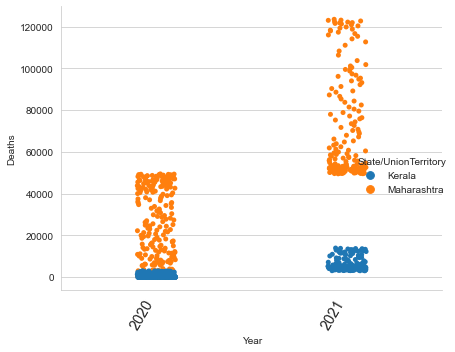

In [66]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")
sns.catplot(data=df[df["State/UnionTerritory"].isin(["Maharashtra","Kerala"])],y="Deaths",x="Year",hue="State/UnionTerritory")
plt.xticks(rotation=60,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

C:\Users\Shrutika\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


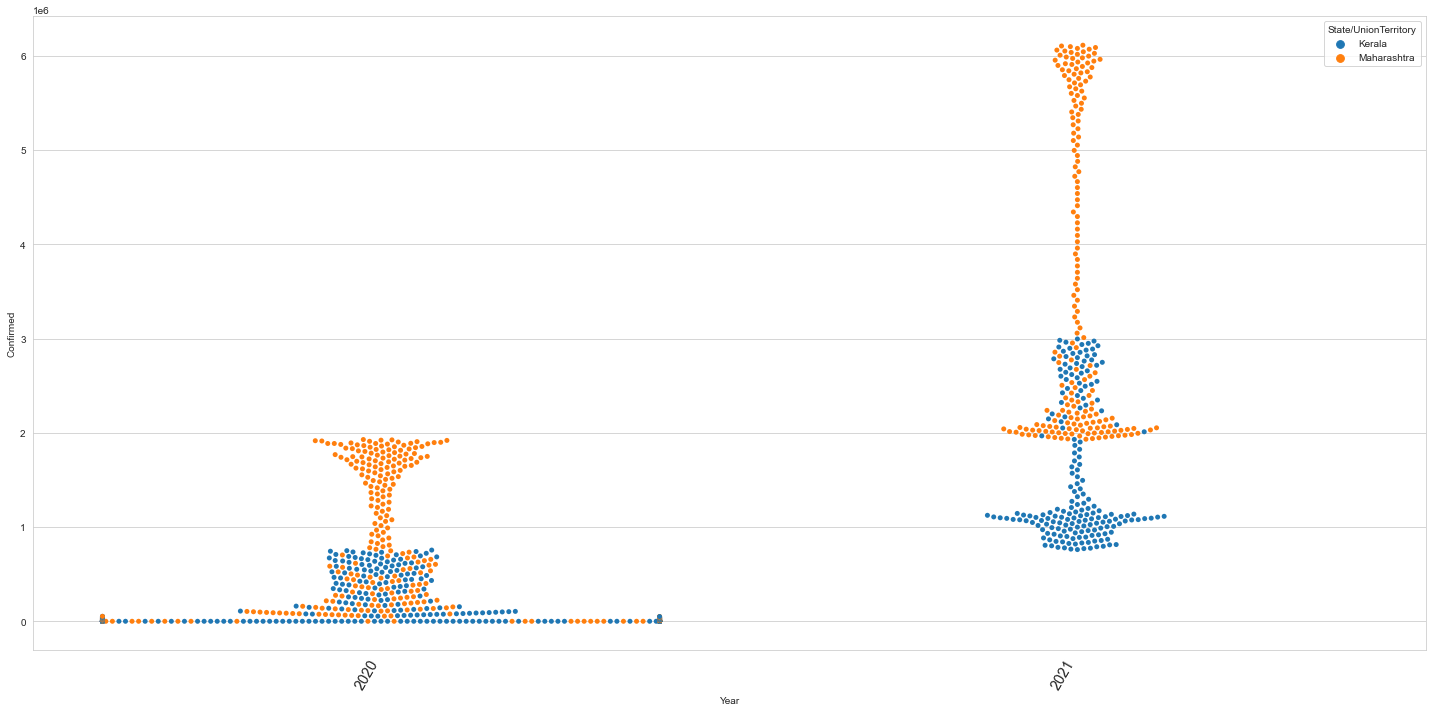

In [135]:
fig=plt.figure(figsize=(20,10))
sns.swarmplot(data=df[df["State/UnionTerritory"].isin(["Maharashtra","Kerala"])],x="Year",y="Confirmed",hue="State/UnionTerritory")
plt.xticks(rotation=60,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

In [34]:
statewise2=df.groupby("Date")[["Confirmed","Cured","Deaths","Active_cases"]].sum().reset_index()

<Figure size 1440x720 with 0 Axes>

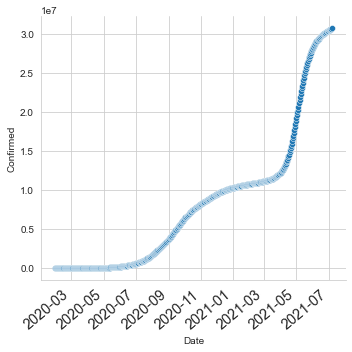

In [35]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.relplot(x="Date",y="Confirmed",data=statewise2)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

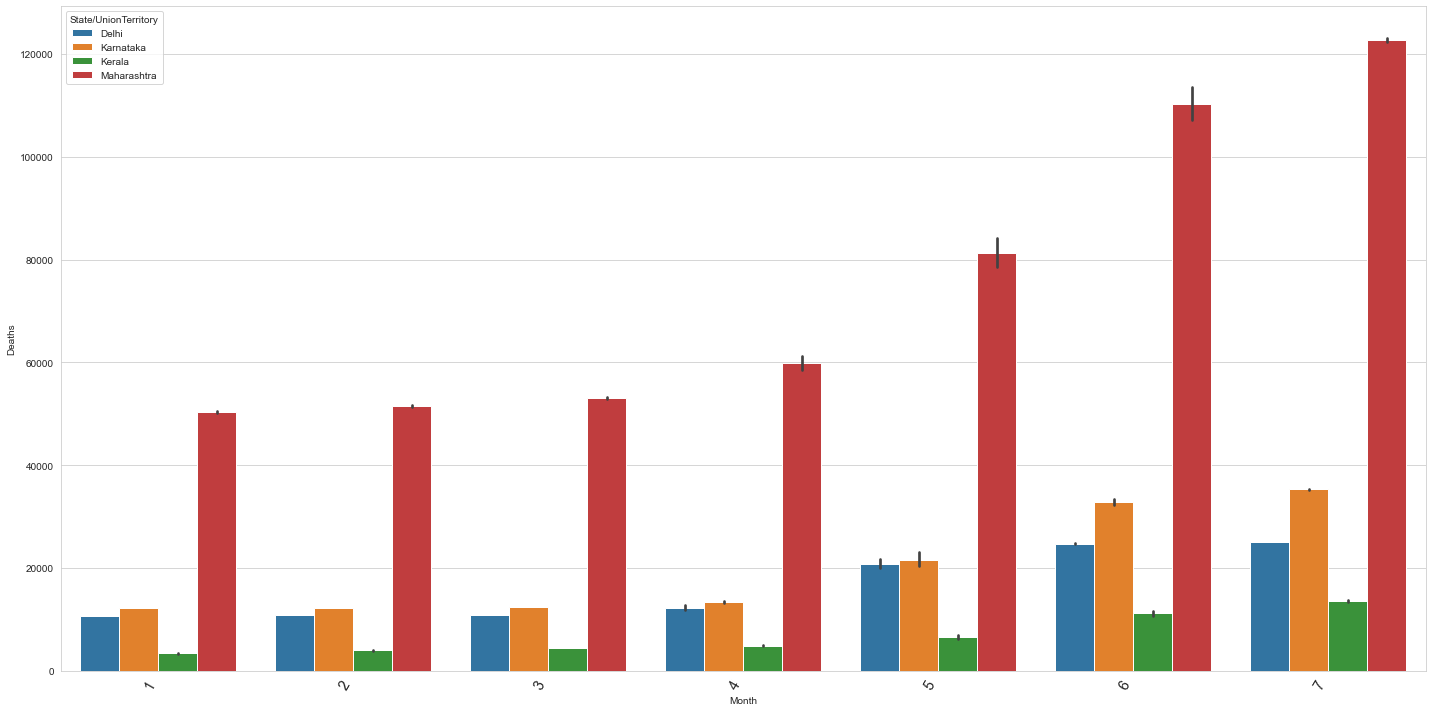

In [35]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")
sns.barplot(data=df[(df["State/UnionTerritory"].isin(["Maharashtra","Kerala","Delhi","Karnataka"])) & df["Year"].isin([2021])]
            ,y="Deaths",x="Month",hue="State/UnionTerritory")
plt.xticks(rotation=60,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

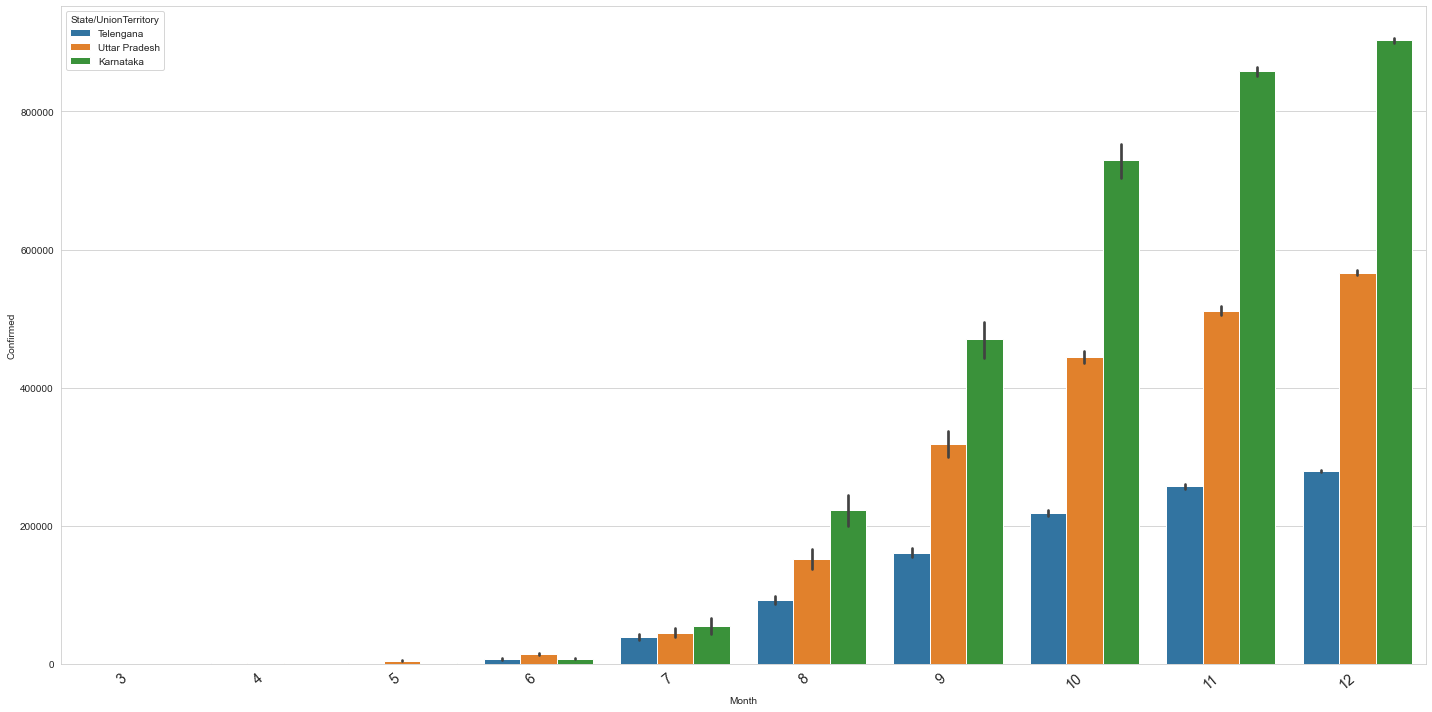

In [36]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="Month",y="Confirmed",data=df[(df["State/UnionTerritory"].isin(["Uttar Pradesh","Telengana","Karnataka"])) & (df["Year"].isin([2020]))],hue="State/UnionTerritory")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

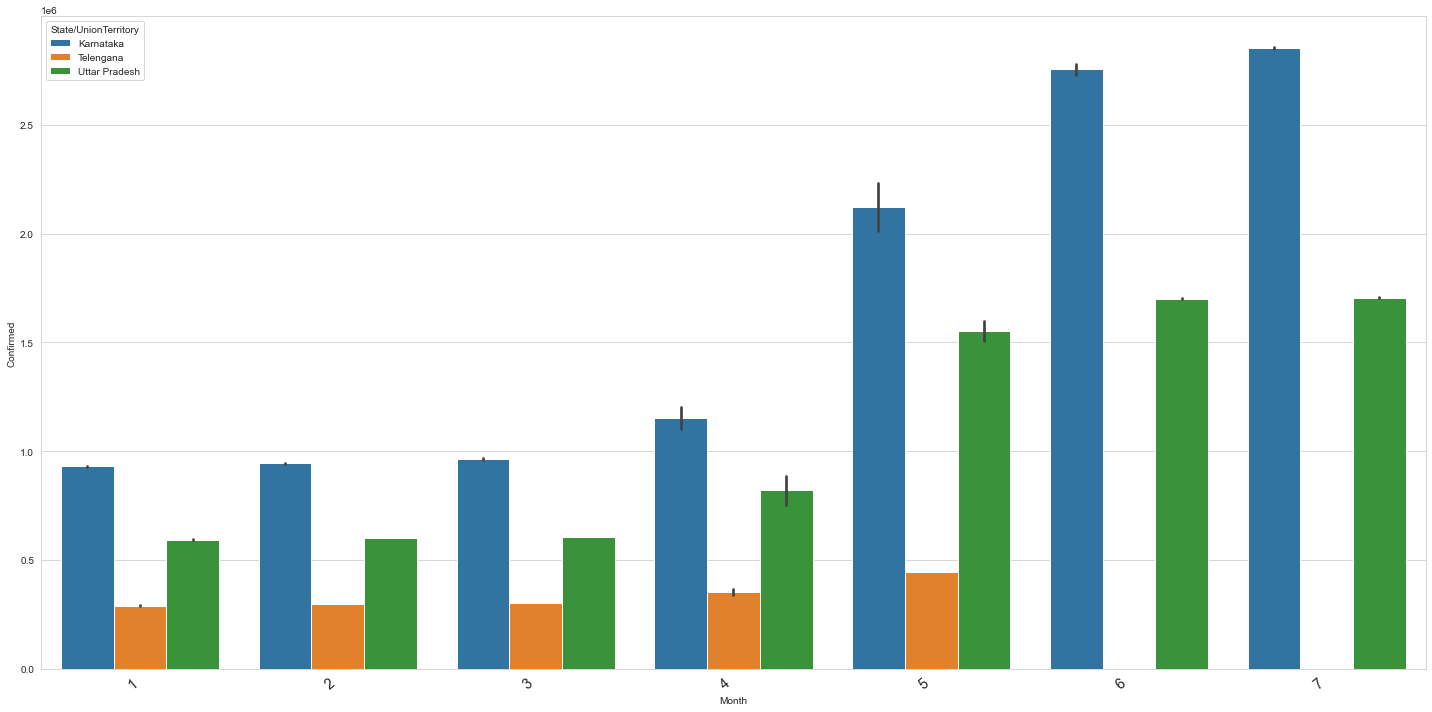

In [37]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="Month",y="Confirmed",data=df[(df["State/UnionTerritory"].isin(["Uttar Pradesh","Telengana","Karnataka"])) & 
                                            (df["Year"].isin([2021]))],hue="State/UnionTerritory")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

<Figure size 5760x4320 with 0 Axes>

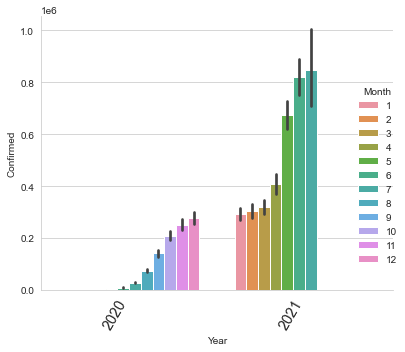

In [38]:
fig=plt.figure(figsize=(80,60))
sns.set_style(style="whitegrid")
sns.catplot(data=df[df["Year"].isin([2020,2021])],y="Confirmed",x="Year",hue="Month",kind="bar")
plt.xticks(rotation=60,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

# RECOVERY & FATALITY RATE-STATEWISE

In [37]:
statewise["Recovery_rate"]=statewise["Cured"]*100/statewise["Confirmed"]
statewise["Fatality_rate"]=statewise["Deaths"]*100/statewise["Confirmed"]
statewise

,State/UnionTerritory,Confirmed,Cured,Deaths,Active_cases,Recovery_rate,Fatality_rate
0,Andaman and Nicobar Islands,1675248,1589935,22624,62689,94.907441,1.350487
1,Andhra Pradesh,324146783,303427899,2475816,18243068,93.608178,0.763795
2,Arunachal Pradesh,5598324,5150519,19303,428502,92.001088,0.344800
3,Assam,80418492,74011348,459575,5947569,92.032748,0.571479
4,Bihar,106881540,100131380,756282,5993878,93.684447,0.707589
5,Bihar****,1430909,1402468,18881,9560,98.012382,1.319511
6,Cases being reassigned to states,345565,0,0,345565,0.000000,0.000000
7,Chandigarh,8691806,7980284,119356,592166,91.813876,1.373201
8,Chhattisgarh,128751782,117163544,1591126,9997112,90.999551,1.235809
9,Dadra and Nagar Haveli,20722,20352,8,362,98.214458,0.038606


In [97]:
#statewise.style.background_gradient(cmap="cubehelix")#color map in matplotlib

In [85]:
#statewise.style.background_gradient(cmap="Reds")

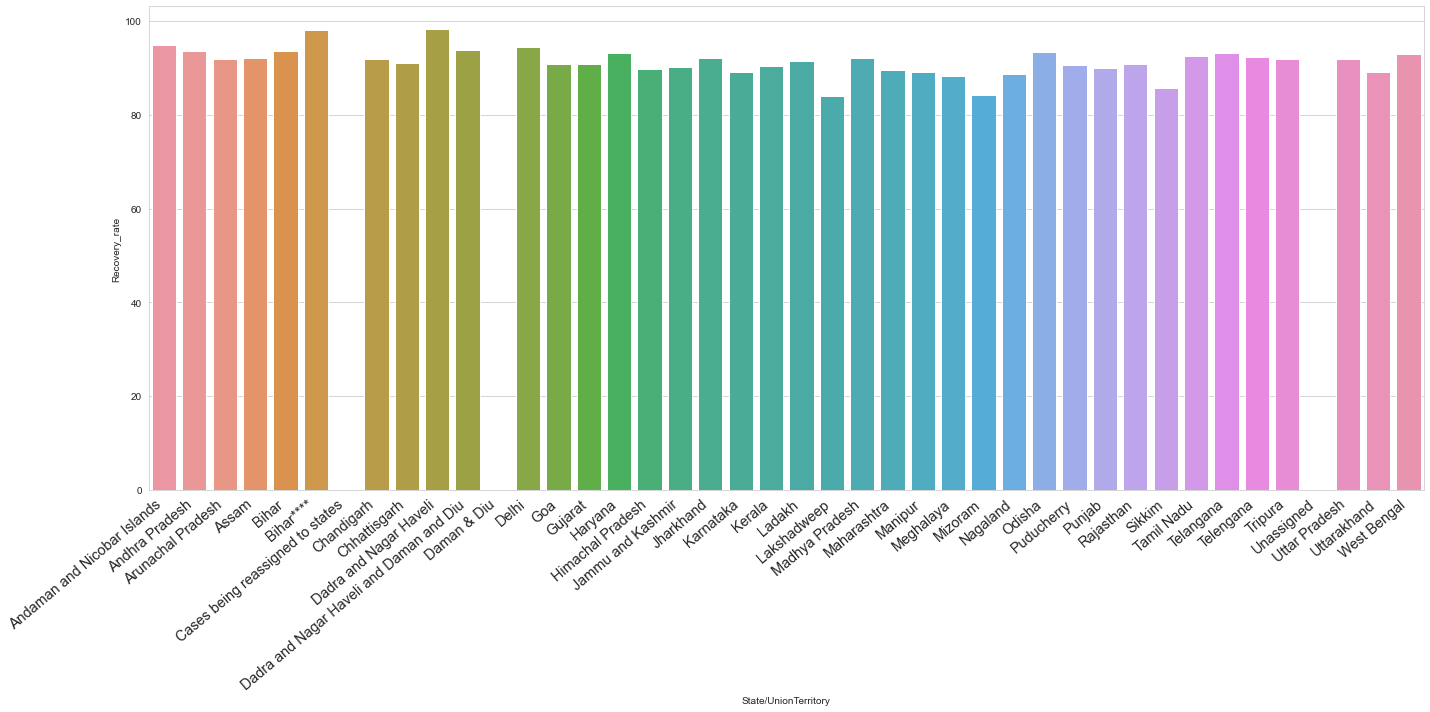

In [38]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="State/UnionTerritory",y="Recovery_rate",data=statewise)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

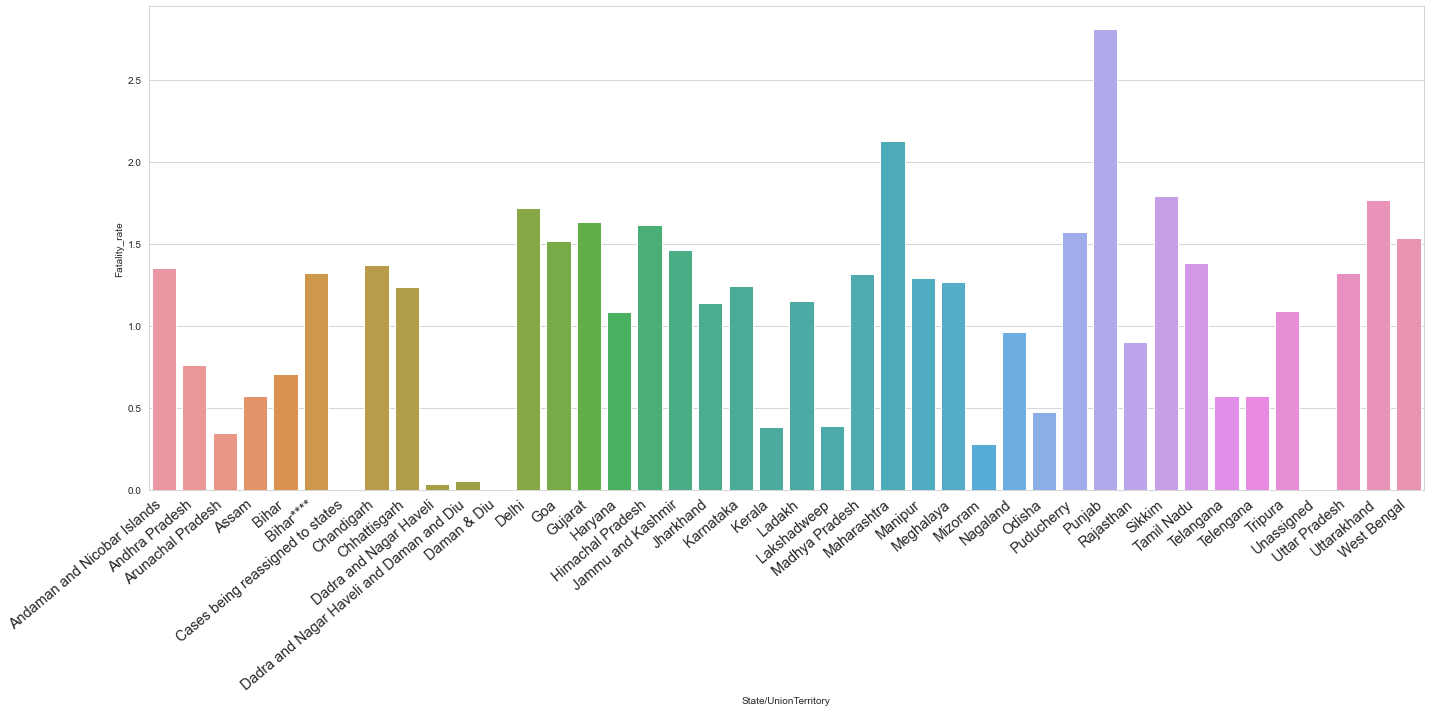

In [39]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="State/UnionTerritory",y="Fatality_rate",data=statewise)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

# PERCENTAGE OF CURED/DEATHS/CONFIRMED-STATEWISE

In [7]:
percentage=df.groupby("State/UnionTerritory")[["Confirmed","Cured","Deaths"]].sum().reset_index()
percentage["Cured_percentage"]=(percentage["Cured"]/percentage["Cured"].sum())*100
percentage["Deaths_percentage"]=(percentage["Deaths"]/percentage["Deaths"].sum())*100
percentage["Confirmed_percentage"]=(percentage["Confirmed"]/percentage["Confirmed"].sum())*100
percentage

,State/UnionTerritory,Confirmed,Cured,Deaths,Cured_percentage,Deaths_percentage,Confirmed_percentage
0,Andaman and Nicobar Islands,1675248,1589935,22624,0.039976,0.038525,3.848068e-02
1,Andhra Pradesh,324146783,303427899,2475816,7.629195,4.215877,7.445697e+00
2,Arunachal Pradesh,5598324,5150519,19303,0.129501,0.032870,1.285943e-01
3,Assam,80418492,74011348,459575,1.860894,0.782575,1.847224e+00
4,Bihar,106881540,100131380,756282,2.517639,1.287815,2.455084e+00
5,Bihar****,1430909,1402468,18881,0.035263,0.032151,3.286818e-02
6,Cases being reassigned to states,345565,0,0,0.000000,0.000000,7.937676e-03
7,Chandigarh,8691806,7980284,119356,0.200651,0.203242,1.996520e-01
8,Chhattisgarh,128751782,117163544,1591126,2.945884,2.709406,2.957446e+00
9,Dadra and Nagar Haveli,20722,20352,8,0.000512,0.000014,4.759872e-04


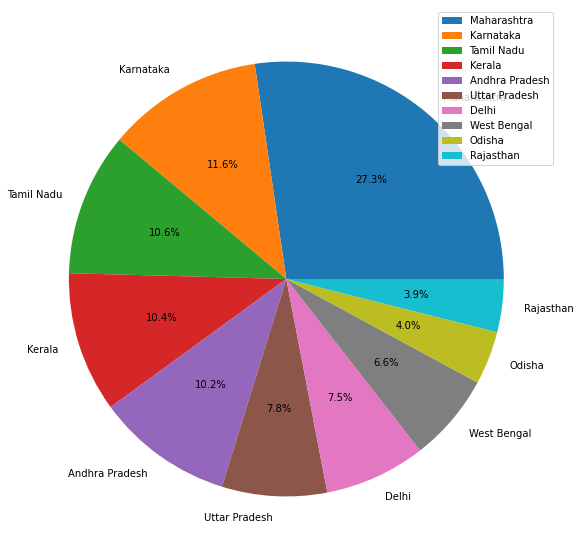

In [57]:
per_cured=percentage.sort_values("Cured_percentage",ascending=False).head(10)
fig=plt.figure(figsize=(20,10))
state=pd.Series(per_cured["State/UnionTerritory"])
cured=pd.Series(per_cured["Cured_percentage"])
plt.pie(cured,labels=state,autopct="%1.1f%%")
plt.legend()
plt.show()


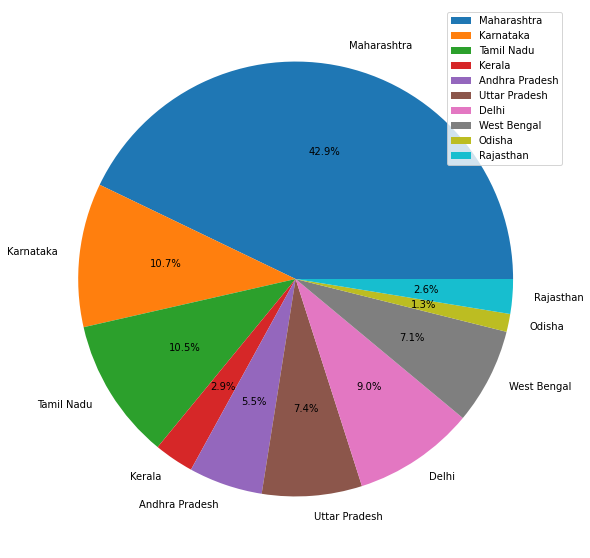

In [34]:
per_deaths=percentage.sort_values("Deaths_percentage",ascending=False).head(10)
fig=plt.figure(figsize=(20,10))
state=pd.Series(per["State/UnionTerritory"])
deaths=pd.Series(per["Deaths_percentage"])
plt.pie(deaths,labels=state,autopct="%1.1f%%")
plt.legend()
plt.show()

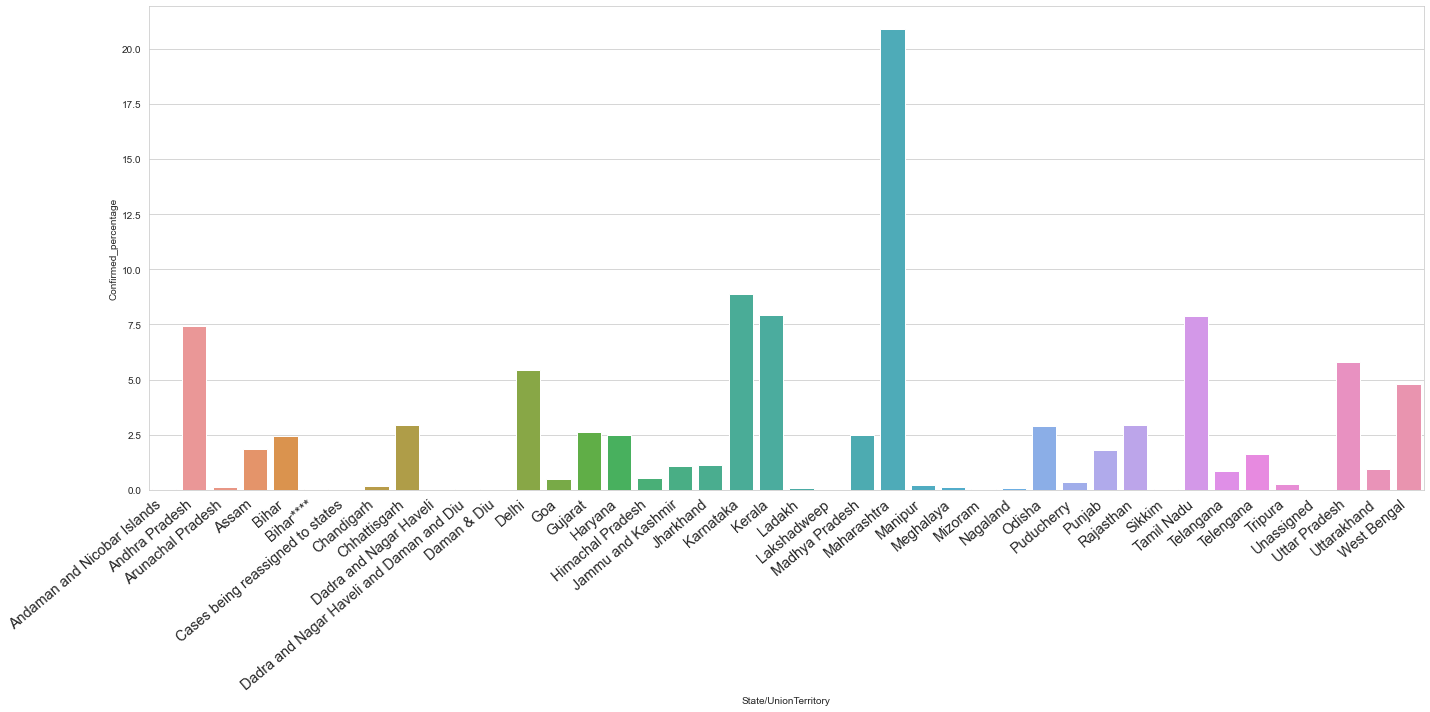

In [51]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="State/UnionTerritory",y="Confirmed_percentage",data=percentage)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

# MORTALITY & PREVALANCE RATE-STATEWISE

In [44]:
popln=pd.Series({"Population":[380581,49386799,1383727,31205576,104099452,0,0,1055450,25545198,0,586956,0,16787941,
                   1458545,60439692,25351462,6864602,12541302,32988134,61095297,33406061,0,64473,72626809,112374333,2855794,2966889,
                   1097206,1978502,41974218,1247953,27743338,68548437,610577,72147030,35193978,0,3673917,0,199812341,10086292,
                   91276115]})

In [45]:
population_wise=df.groupby("State/UnionTerritory")[["Cured","Deaths","Confirmed","Active_cases"]].sum().reset_index()

In [46]:
population_wise

,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
0,Andaman and Nicobar Islands,1589935,22624,1675248,62689
1,Andhra Pradesh,303427899,2475816,324146783,18243068
2,Arunachal Pradesh,5150519,19303,5598324,428502
3,Assam,74011348,459575,80418492,5947569
4,Bihar,100131380,756282,106881540,5993878
5,Bihar****,1402468,18881,1430909,9560
6,Cases being reassigned to states,0,0,345565,345565
7,Chandigarh,7980284,119356,8691806,592166
8,Chhattisgarh,117163544,1591126,128751782,9997112
9,Dadra and Nagar Haveli,20352,8,20722,362


In [47]:
population_wise["Population"]=popln["Population"]

In [48]:
population_wise

,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases,Population
0,Andaman and Nicobar Islands,1589935,22624,1675248,62689,380581
1,Andhra Pradesh,303427899,2475816,324146783,18243068,49386799
2,Arunachal Pradesh,5150519,19303,5598324,428502,1383727
3,Assam,74011348,459575,80418492,5947569,31205576
4,Bihar,100131380,756282,106881540,5993878,104099452
5,Bihar****,1402468,18881,1430909,9560,0
6,Cases being reassigned to states,0,0,345565,345565,0
7,Chandigarh,7980284,119356,8691806,592166,1055450
8,Chhattisgarh,117163544,1591126,128751782,9997112,25545198
9,Dadra and Nagar Haveli,20352,8,20722,362,0


In [53]:
population_wise["Mortality_rate"]=(population_wise["Deaths"]/population_wise["Population"])*100
population_wise["Prevalance_rate"]=population_wise["Active_cases"]/population_wise["Population"]

In [54]:
population_wise

,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases,Population,Mortality_rate,Prevalance_rate
0,Andaman and Nicobar Islands,1589935,22624,1675248,62689,380581,5.944595,0.164719
1,Andhra Pradesh,303427899,2475816,324146783,18243068,49386799,5.013113,0.369392
2,Arunachal Pradesh,5150519,19303,5598324,428502,1383727,1.395001,0.309672
3,Assam,74011348,459575,80418492,5947569,31205576,1.472734,0.190593
4,Bihar,100131380,756282,106881540,5993878,104099452,0.726500,0.057578
5,Bihar****,1402468,18881,1430909,9560,0,inf,inf
6,Cases being reassigned to states,0,0,345565,345565,0,NaN,inf
7,Chandigarh,7980284,119356,8691806,592166,1055450,11.308541,0.561055
8,Chhattisgarh,117163544,1591126,128751782,9997112,25545198,6.228670,0.391350
9,Dadra and Nagar Haveli,20352,8,20722,362,0,inf,inf


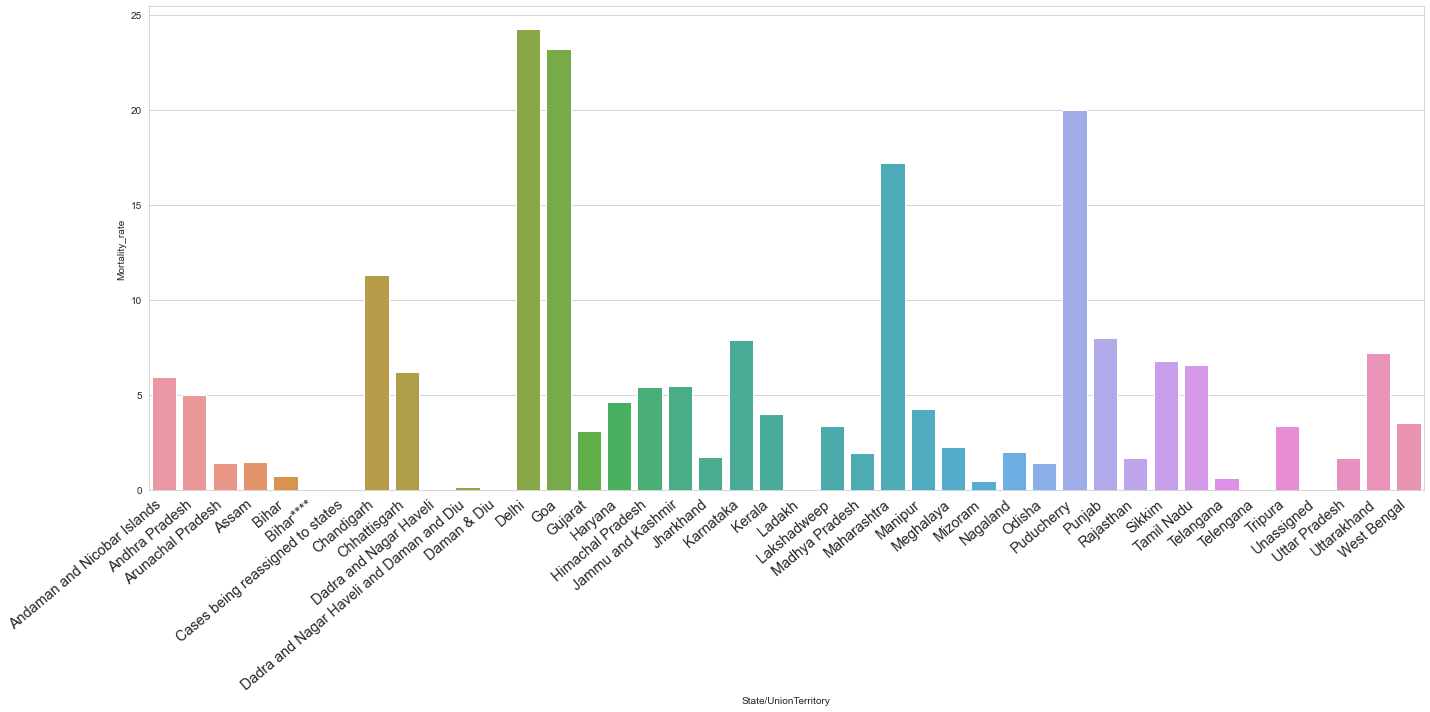

In [52]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="State/UnionTerritory",y="Mortality_rate",data=population_wise)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

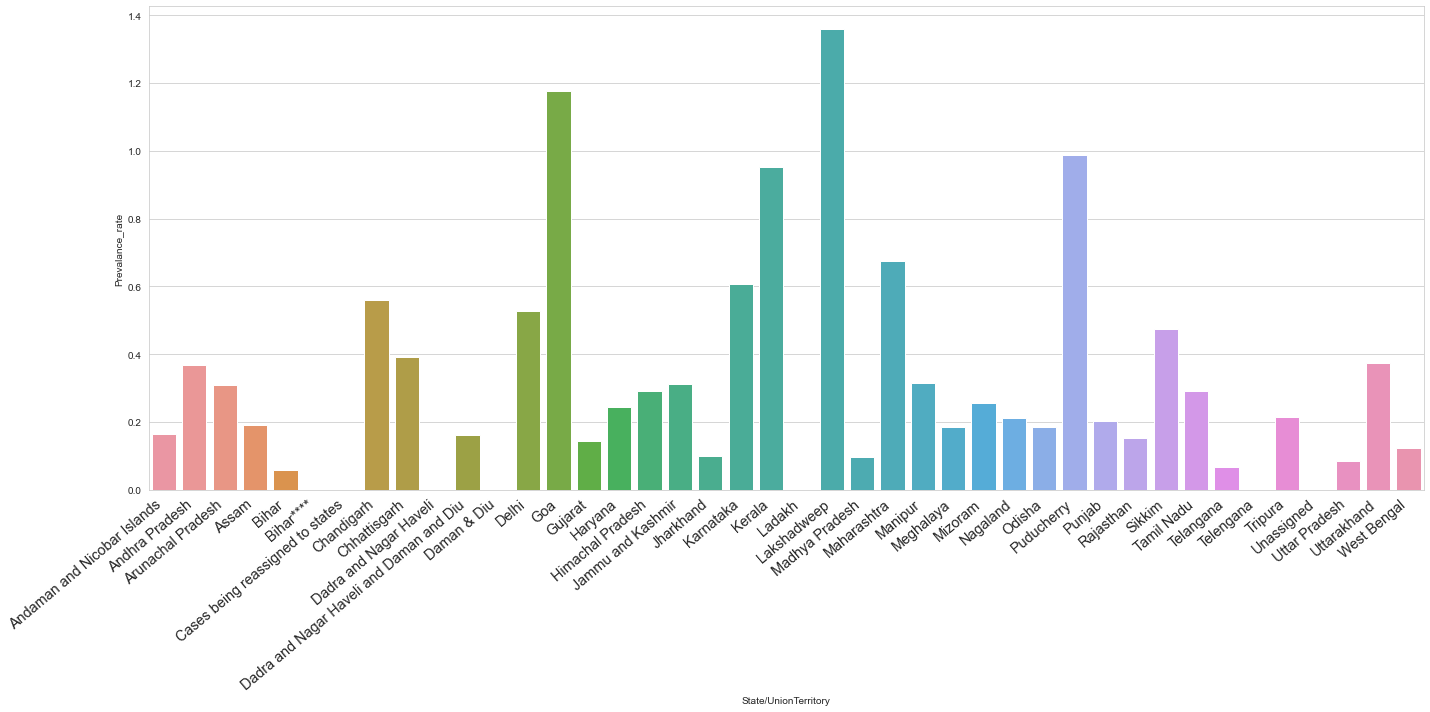

In [55]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="State/UnionTerritory",y="Prevalance_rate",data=population_wise)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

# HIGHEST CURED/DEATHS/CON CASES-STATEWISE

In [55]:
#top 5 states with high cured covid cases:
highest=df.groupby("State/UnionTerritory")[["Cured","Deaths","Confirmed"]].sum().sort_values(by="Confirmed",ascending=False)
.head(10).reset_index()
highest

,State/UnionTerritory,Cured,Deaths,Confirmed
0,Maharashtra,813788907,19314532,908892470
1,Karnataka,345648926,4819018,387597335
2,Kerala,311127643,1327754,344319045
3,Tamil Nadu,317067499,4731627,342829697
4,Andhra Pradesh,303427899,2475816,324146783
5,Uttar Pradesh,232529439,3347656,252843682
6,Delhi,224062704,4066907,236972842
7,West Bengal,195296839,3214840,209822848
8,Rajasthan,117312772,1159823,128998101
9,Chhattisgarh,117163544,1591126,128751782


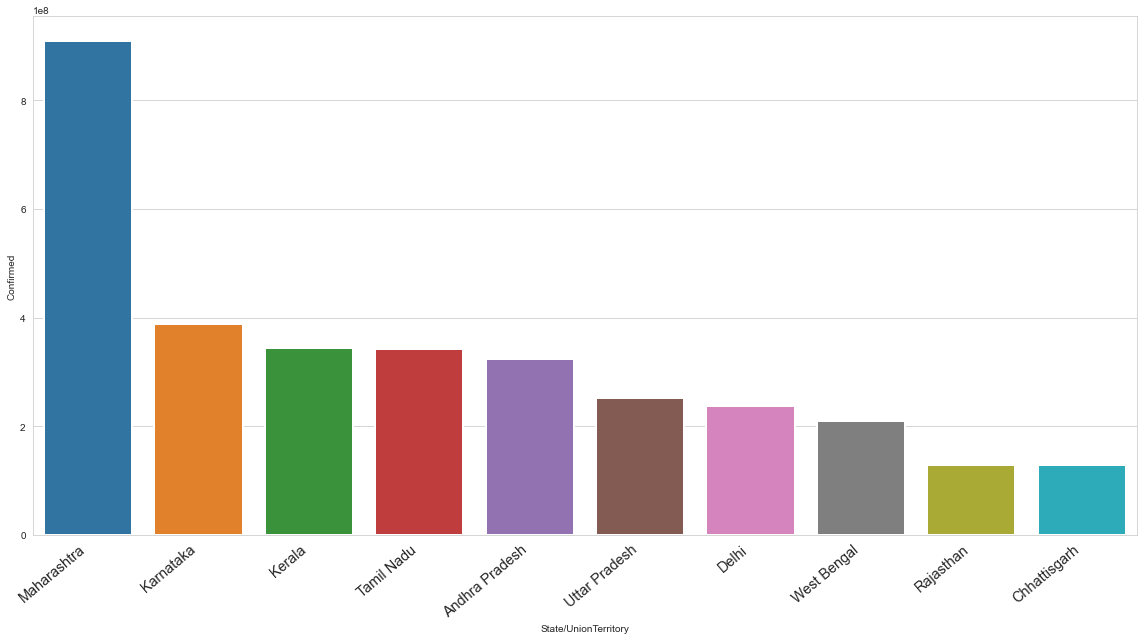

In [57]:
fig=plt.figure(figsize=(16,9))
sns.barplot(data=highest,x="State/UnionTerritory",y="Confirmed",linewidth=2)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

# LOWEST CURED/DEATHS/CON CASES-STATEWISE

In [59]:
#top 5 states with low cured covid cases:
lowest=df.groupby("State/UnionTerritory")[["Cured","Deaths","Confirmed"]].sum().sort_values(by="Confirmed",ascending=True)
.head(10).reset_index()
lowest

,State/UnionTerritory,Cured,Deaths,Confirmed
0,Daman & Diu,0,0,2
1,Unassigned,0,0,161
2,Dadra and Nagar Haveli,20352,8,20722
3,Cases being reassigned to states,0,0,345565
4,Lakshadweep,471712,2178,561459
5,Bihar****,1402468,18881,1430909
6,Dadra and Nagar Haveli and Daman and Diu,1470986,874,1566846
7,Andaman and Nicobar Islands,1589935,22624,1675248
8,Mizoram,1534630,5073,1822190
9,Sikkim,1983899,41530,2315519


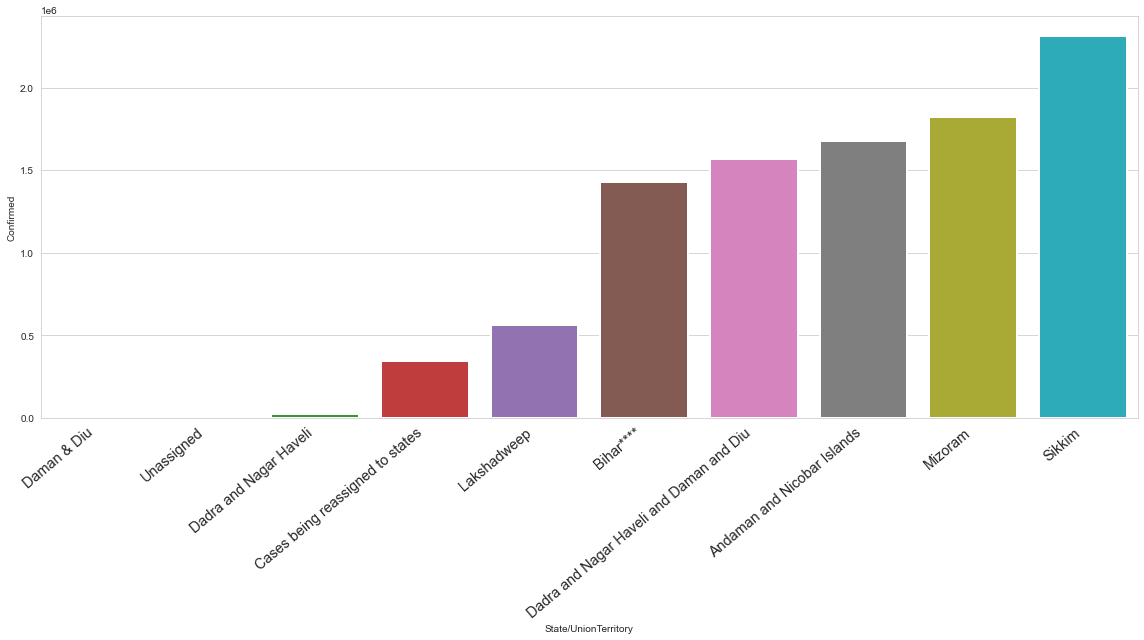

In [60]:
fig=plt.figure(figsize=(16,9))
sns.barplot(data=lowest,x="State/UnionTerritory",y="Confirmed",linewidth=2)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

# HIGHEST  CASES-DATEWISE

In [101]:
high=df.groupby("Date")[["Cured","Deaths","Confirmed"]].sum().sort_values(by="Confirmed",ascending=False).head(30).reset_index()
high

,Date,Cured,Deaths,Confirmed
0,2021-07-07,29799534,404211,30663665
1,2021-07-06,29752294,403281,30619932
2,2021-07-05,29700430,402728,30585229
3,2021-07-04,29658078,402005,30545433
4,2021-07-03,29605779,401050,30502362
5,2021-07-02,29548302,400312,30458251
6,2021-07-01,29488918,399459,30411634
7,2021-06-30,29427330,398454,30362848
8,2021-06-29,29366601,397637,30316897
9,2021-06-28,29309607,396730,30279331


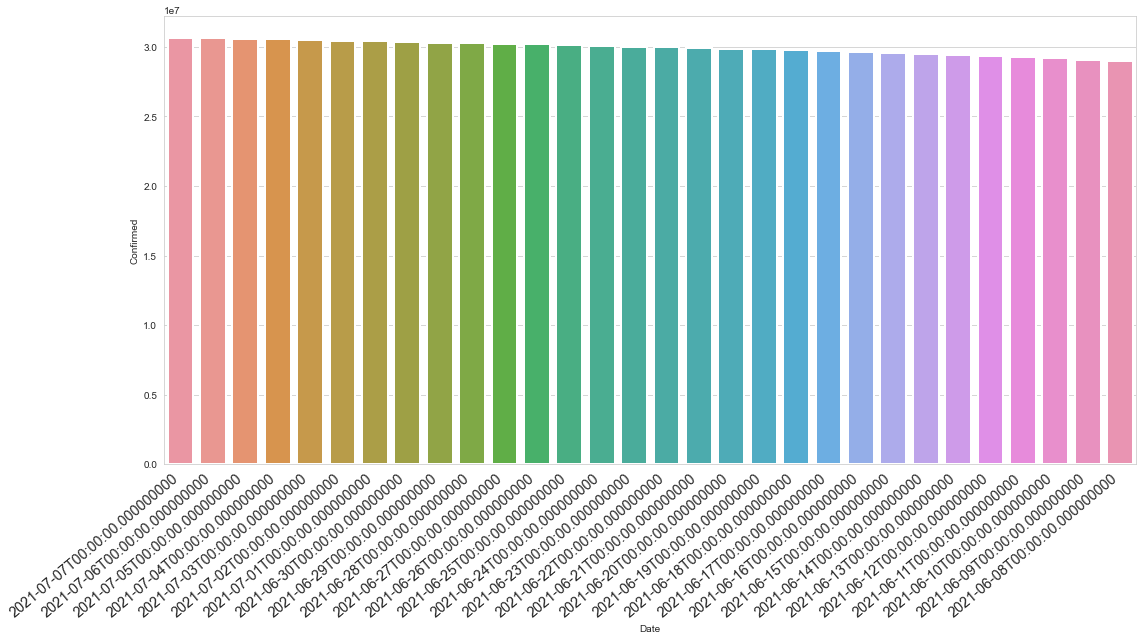

In [102]:
fig=plt.figure(figsize=(16,9))
sns.barplot(data=high,x="Date",y="Confirmed",linewidth=2)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

# LOWEST CASES-DATEWISE

In [105]:
low=df.groupby("Date")[["Cured","Deaths","Confirmed"]].sum().sort_values(by="Confirmed",ascending=True).head(30).reset_index()
low

,Date,Cured,Deaths,Confirmed
0,2020-01-30,0,0,1
1,2020-01-31,0,0,1
2,2020-02-01,0,0,2
3,2020-02-18,0,0,3
4,2020-02-19,0,0,3
5,2020-02-20,0,0,3
6,2020-02-21,0,0,3
7,2020-02-22,0,0,3
8,2020-02-23,0,0,3
9,2020-02-24,0,0,3


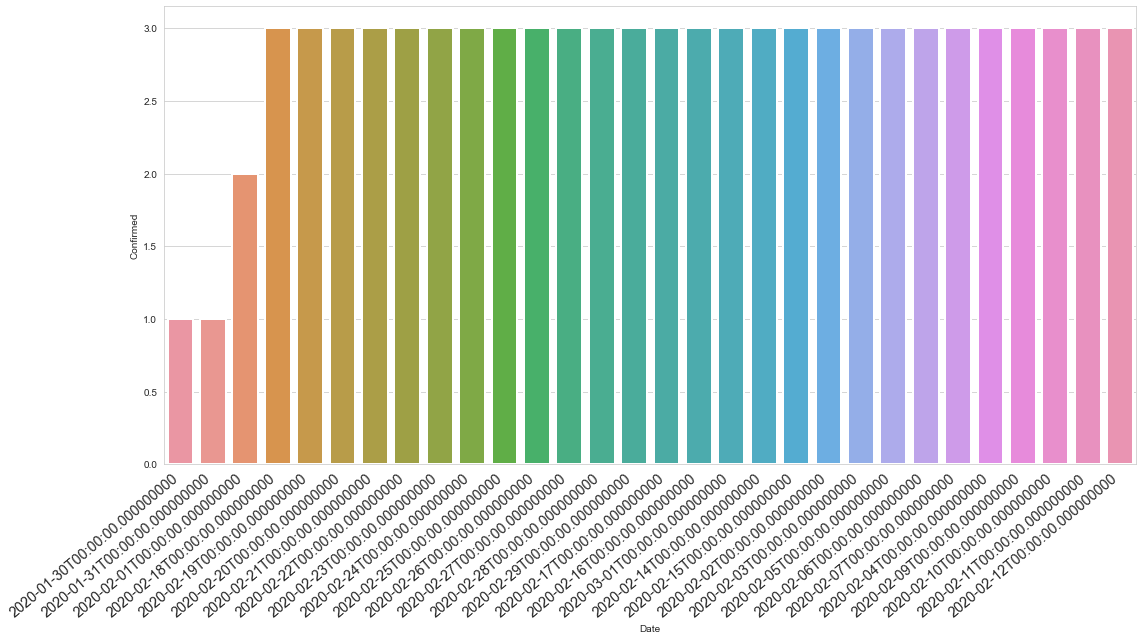

In [106]:
fig=plt.figure(figsize=(16,9))
sns.barplot(data=low,x="Date",y="Confirmed",linewidth=2)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

# GROWTH RATE

In [61]:
growth_rate=df[["Date","State/UnionTerritory","Active_cases"]]
[(df["State/UnionTerritory"]=="Maharashtra") | (df["State/UnionTerritory"]=="Kerala") | (df["State/UnionTerritory"]=="Karnataka")]

In [62]:
growth_rate

,Date,State/UnionTerritory,Active_cases
0,2020-01-30,Kerala,1
1,2020-01-31,Kerala,1
2,2020-02-01,Kerala,2
3,2020-02-02,Kerala,3
4,2020-02-03,Kerala,3
...,...,...,...
16794,2021-07-06,Kerala,101097
16798,2021-07-06,Maharashtra,120061
16829,2021-07-07,Karnataka,40039
16830,2021-07-07,Kerala,104577


<AxesSubplot:xlabel='Date', ylabel='Active_cases'>

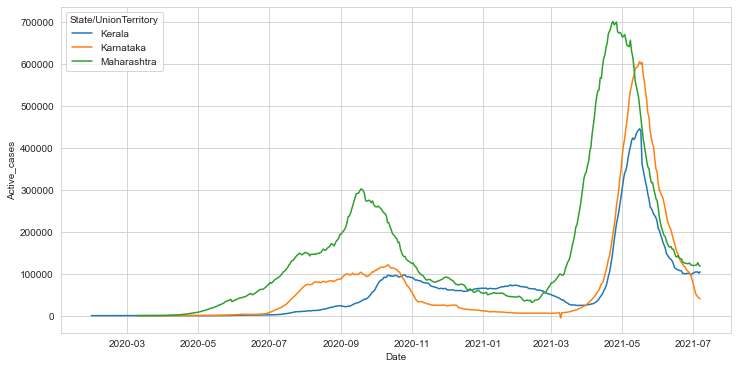

In [63]:
fig=plt.figure(figsize=(12,6))
sns.lineplot(data=growth_rate,x="Date",y="Active_cases",hue="State/UnionTerritory")

<Figure size 1440x720 with 0 Axes>

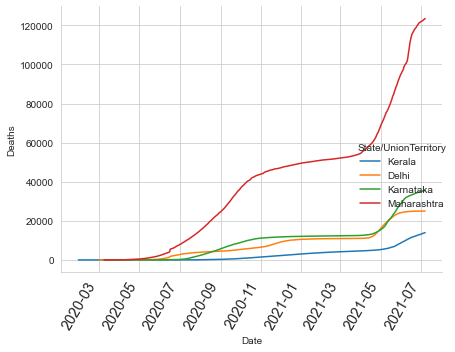

In [64]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")
sns.relplot(y="Deaths",x="Date",hue="State/UnionTerritory",data=df[df["State/UnionTerritory"].isin(["Maharashtra","Kerala","Delhi","Karnataka"])],kind="line")
plt.xticks(rotation=60,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

<Figure size 7200x9360 with 0 Axes>

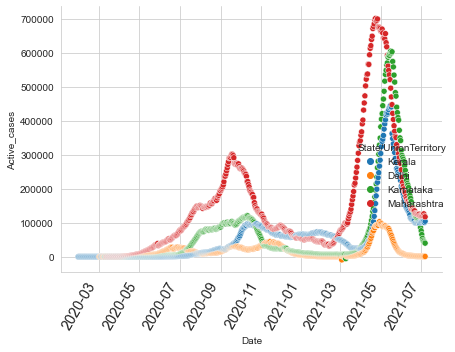

In [66]:
fig=plt.figure(figsize=(100,130))
sns.set_style(style="whitegrid")
sns.relplot(y="Active_cases",x="Date",hue="State/UnionTerritory",data=df[df["State/UnionTerritory"].isin(["Maharashtra","Kerala","Delhi","Karnataka"])])
plt.xticks(rotation=60,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

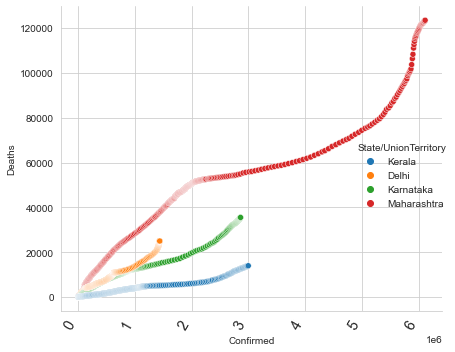

In [19]:
# fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")
sns.relplot(data=df[df["State/UnionTerritory"].isin(["Maharashtra","Kerala","Delhi","Karnataka"])],y="Deaths",x="Confirmed"
            ,hue="State/UnionTerritory")
plt.xticks(rotation=60,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

# MAHARASHTRA

# YEAR & MONTHS-CURED/DEATHS/CONF

In [41]:
maha=df[df["State/UnionTerritory"]=="Maharashtra"]

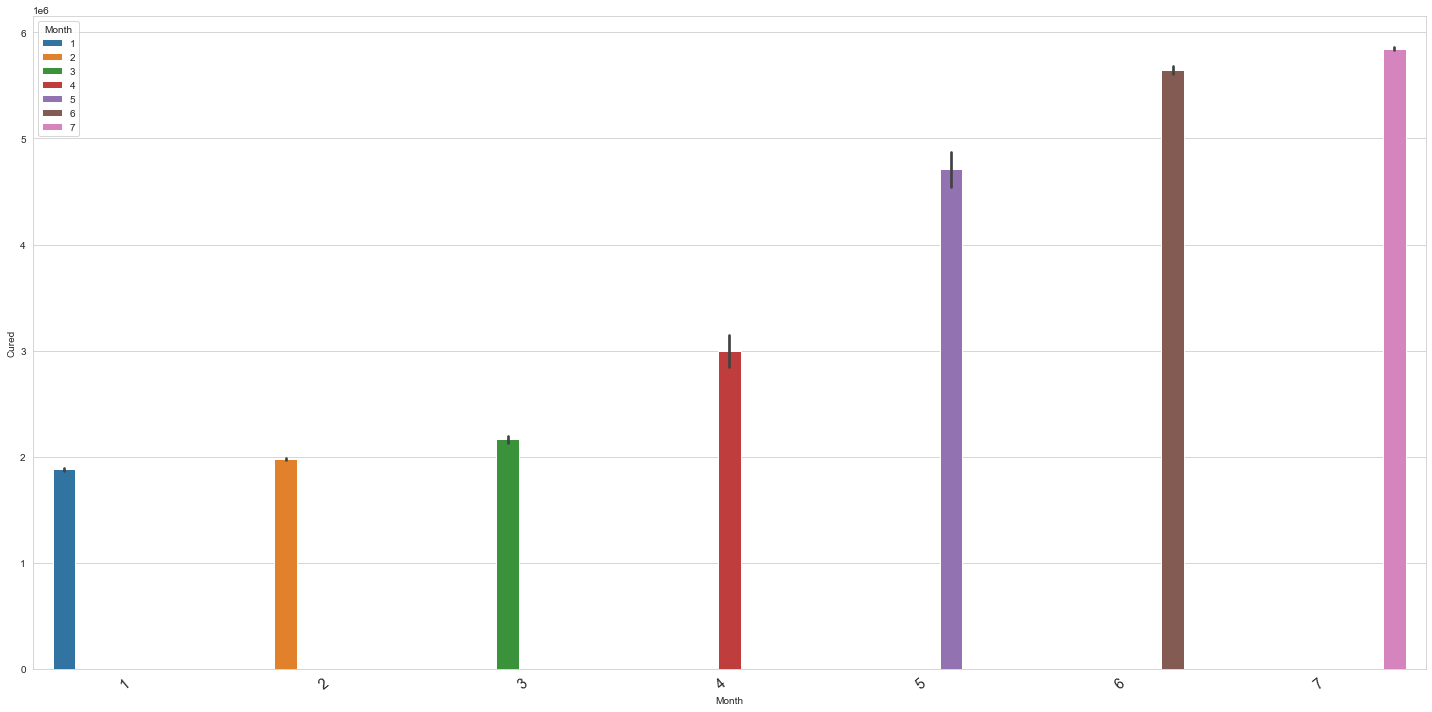

In [42]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="Month",y="Cured",data=maha[maha["Year"].isin([2021])],hue="Month")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

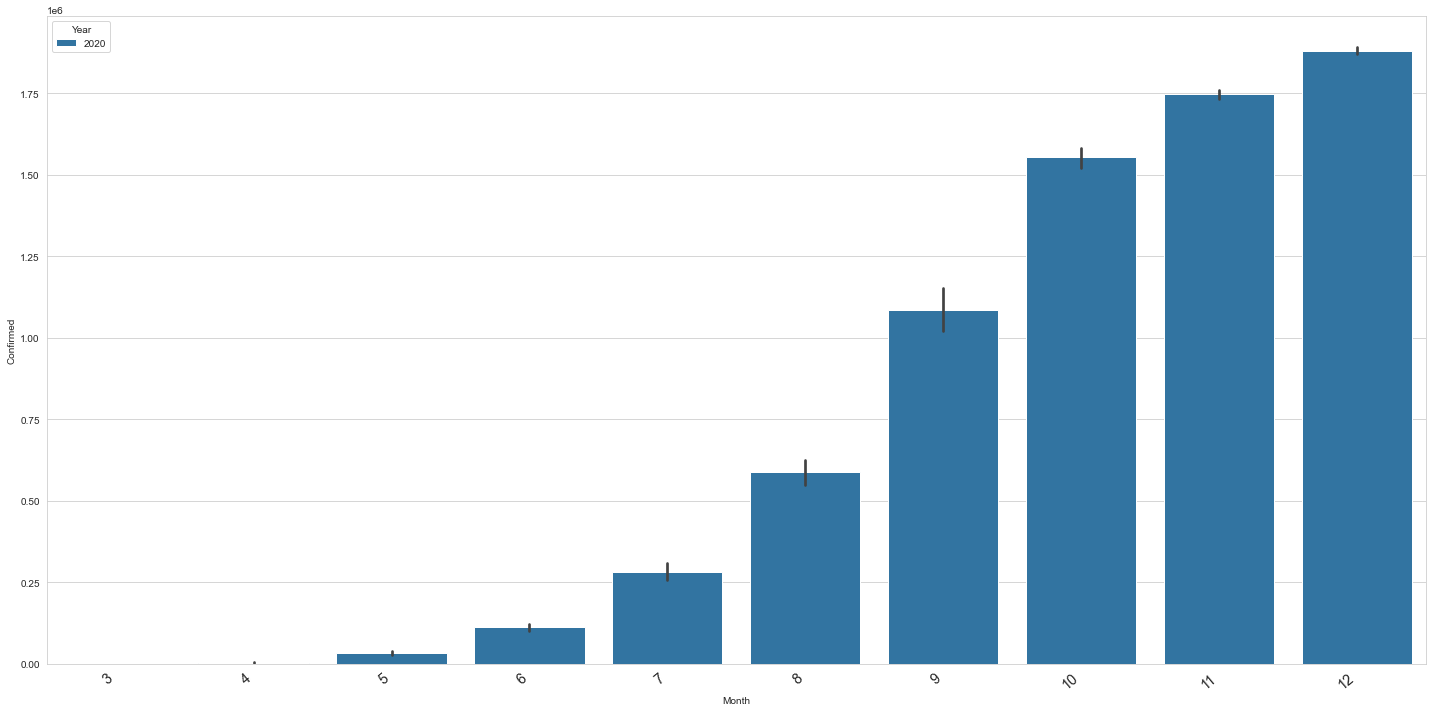

In [43]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="Month",y="Confirmed",data=maha[maha["Year"].isin([2020])],hue="Year")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

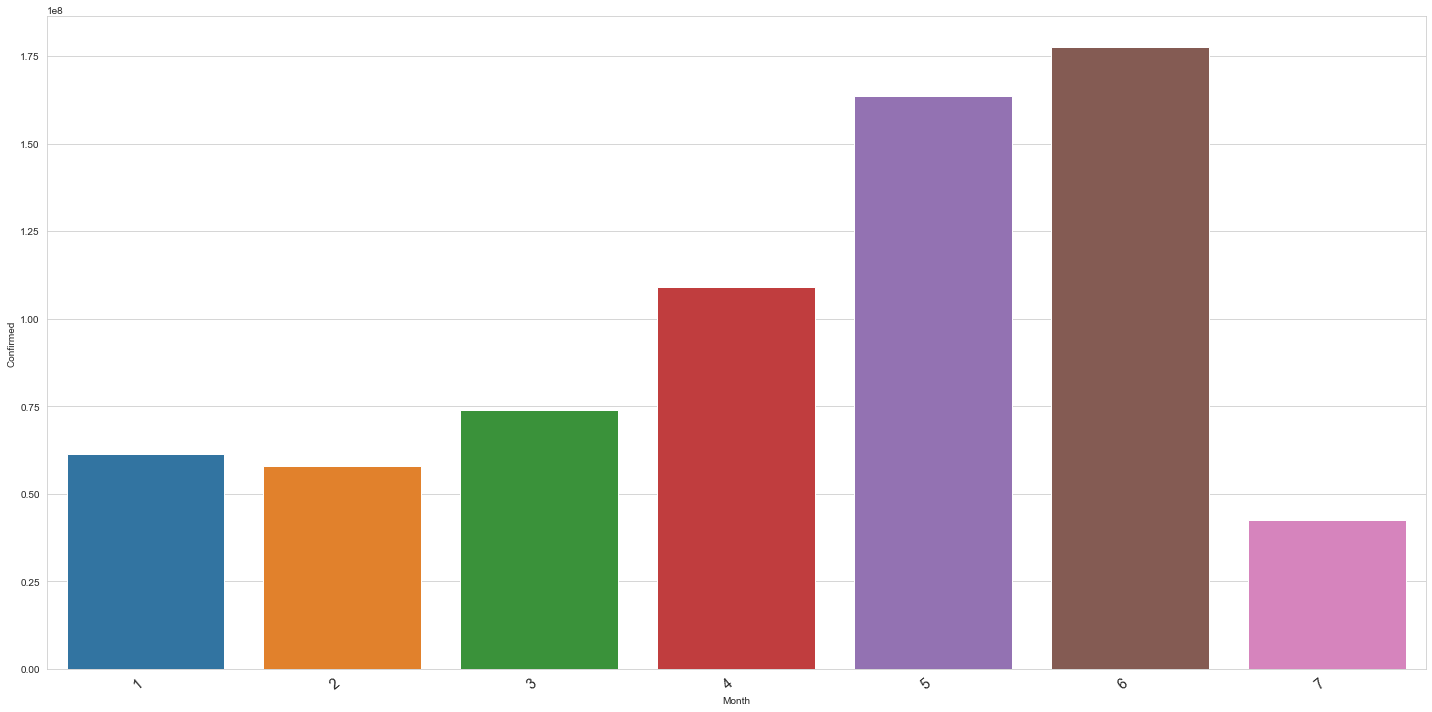

In [50]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="Month",y="Confirmed",data=maha_group[maha_group["Year"].isin([2021])])
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

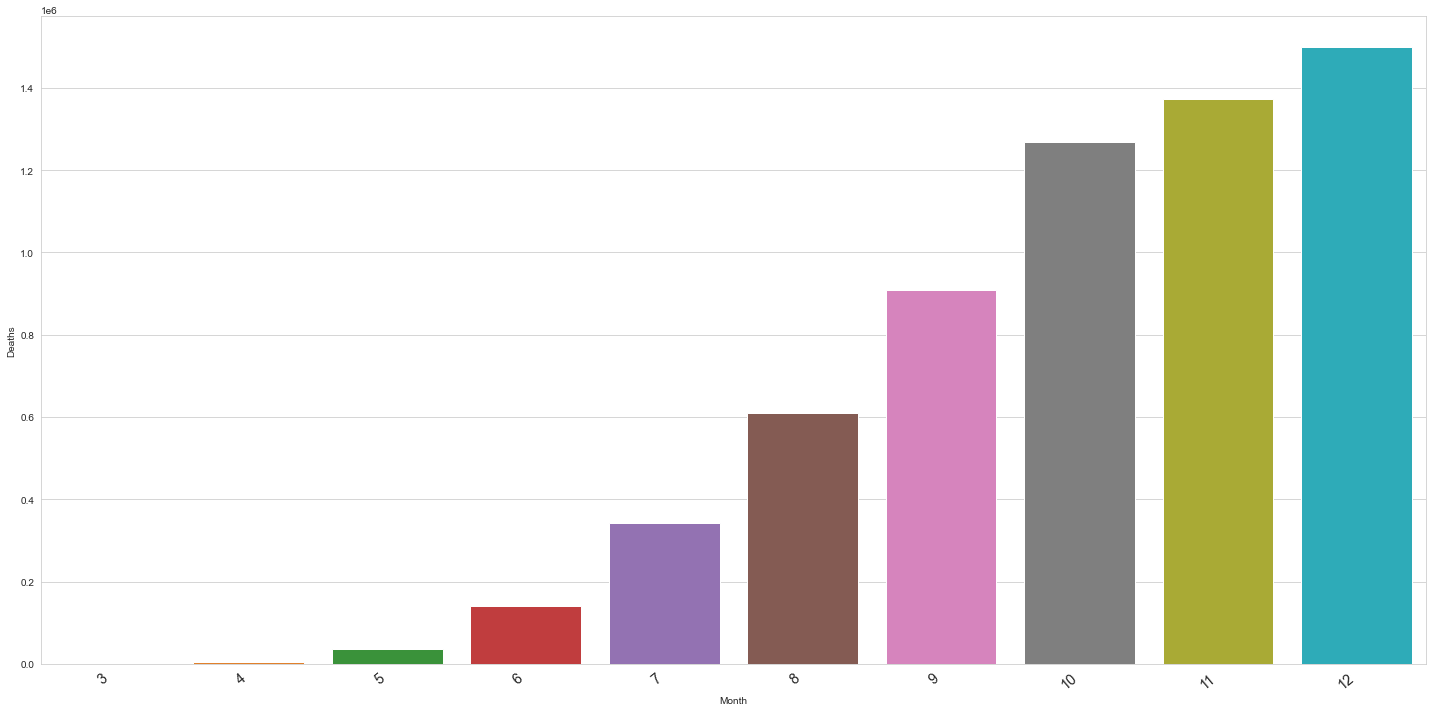

In [49]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="Month",y="Deaths",data=maha_group[maha_group["Year"].isin([2020])])
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

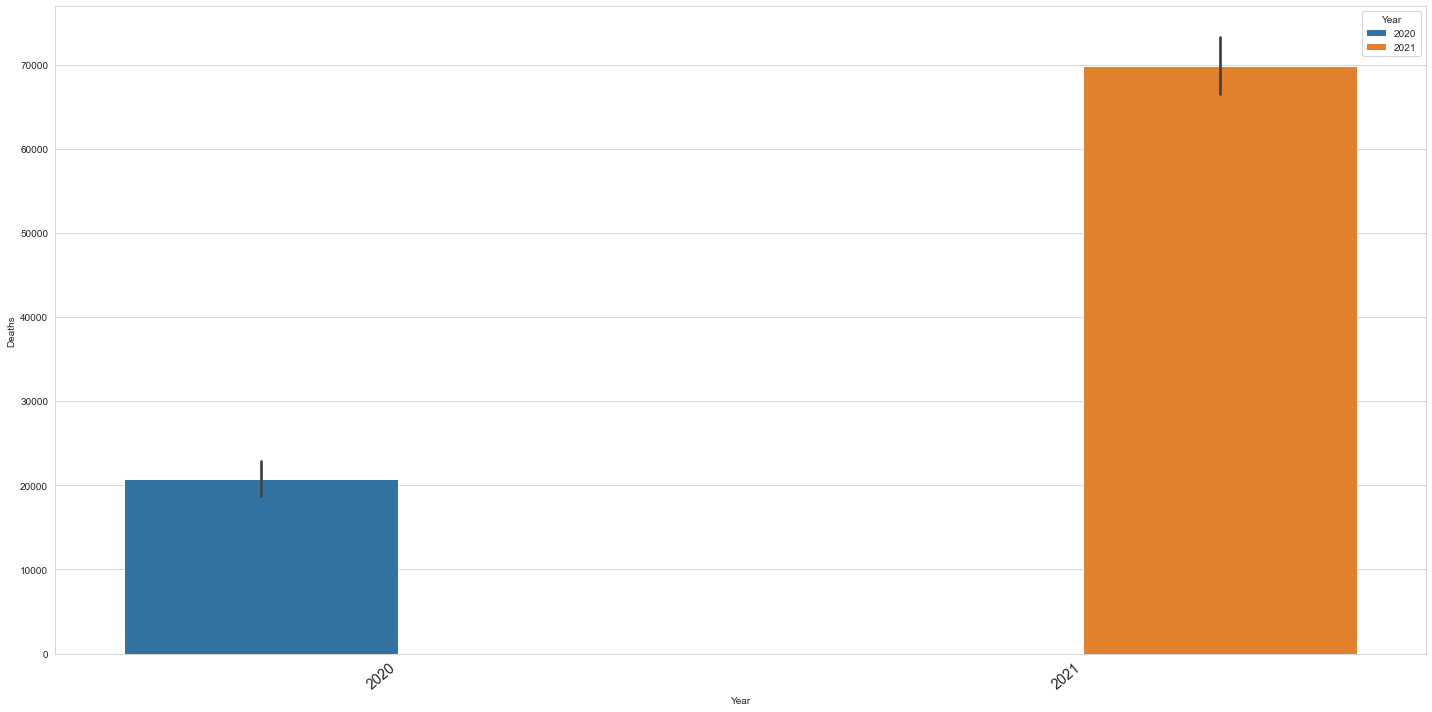

In [152]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="Year",y="Deaths",data=maha,hue="Year")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

# RECOVERY & FATALITY RATE-

In [48]:
maha_group=maha.groupby(["Year","Month"])[["Cured","Deaths","Confirmed"]].sum().reset_index()
maha_group["Recovery_rate"]=maha_group["Cured"]*100/maha_group["Confirmed"]
maha_group["Fatality_rate"]=maha_group["Deaths"]*100/maha_group["Confirmed"]

In [38]:
maha_group

,Year,Month,Cured,Deaths,Confirmed,Recovery_rate,Fatality_rate
0,2020,3,131,49,1747,7.498569,2.804808
1,2020,4,13946,5354,107038,13.029018,5.001962
2,2020,5,278831,35892,1014118,27.494927,3.539233
3,2020,6,1645719,141287,3354374,49.061882,4.212023
4,2020,7,4906066,342978,8774499,55.912776,3.908804
5,2020,8,12695192,609995,18227851,69.647223,3.346500
6,2020,9,23832012,908307,32562680,73.188116,2.789411
7,2020,10,40815564,1269079,48150932,84.765886,2.635627
8,2020,11,48214136,1372935,52401197,92.009608,2.620045
9,2020,12,54632673,1499062,58306196,93.699601,2.571017


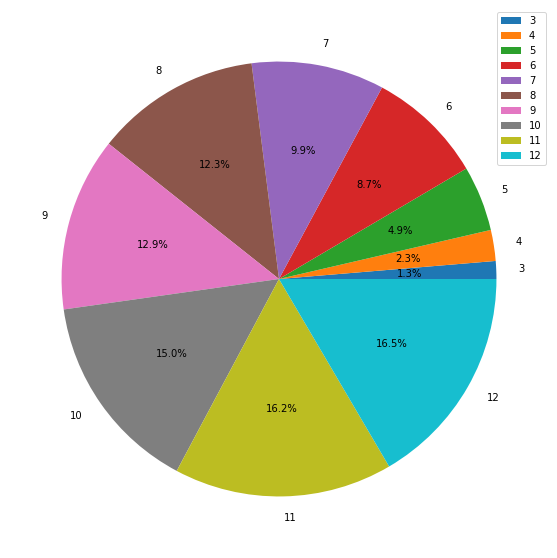

In [52]:
fig=plt.figure(figsize=(20,10))
month_2020=pd.Series(maha_group["Month"][maha_group["Year"].isin([2020])])
recovery_2020=pd.Series(maha_group["Recovery_rate"][maha_group["Year"].isin([2020])])
plt.pie(recovery_2020,labels=month_2020,autopct="%1.1f%%")
plt.legend()
plt.show()

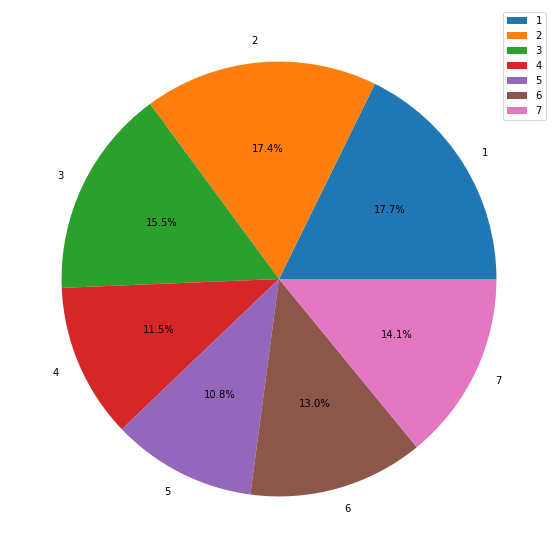

In [55]:
fig=plt.figure(figsize=(20,10))
month_2021=pd.Series(maha_group["Month"][maha_group["Year"].isin([2021])])
fatality_2021=pd.Series(maha_group["Fatality_rate"][maha_group["Year"].isin([2021])])
plt.pie(fatality_2021,labels=month_2021,autopct="%1.1f%%")
plt.legend()
plt.show()

# HIGHEST CURED/DEATHS/CONF- DATEWISE

In [172]:
top_date=maha.groupby("Date")[["Cured","Deaths","Confirmed"]].sum().sort_values("Deaths",ascending=False).reset_index().head(30)

In [164]:
maha.groupby("Date")[["Cured","Deaths","Confirmed"]].sum().sort_values("Deaths",ascending=False).reset_index().head(10)

,Date,Cured,Deaths,Confirmed
0,2021-07-07,5872268,123531,6113335
1,2021-07-06,5861720,123136,6104917
2,2021-07-05,5848693,123030,6098177
3,2021-07-04,5845315,122724,6088841
4,2021-07-03,5836920,122353,6079352
5,2021-07-02,5828535,122197,6070599
6,2021-07-01,5819901,121945,6061404
7,2021-06-30,5809548,121804,6051633
8,2021-06-29,5800925,121573,6043548
9,2021-06-28,5790113,121286,6036821


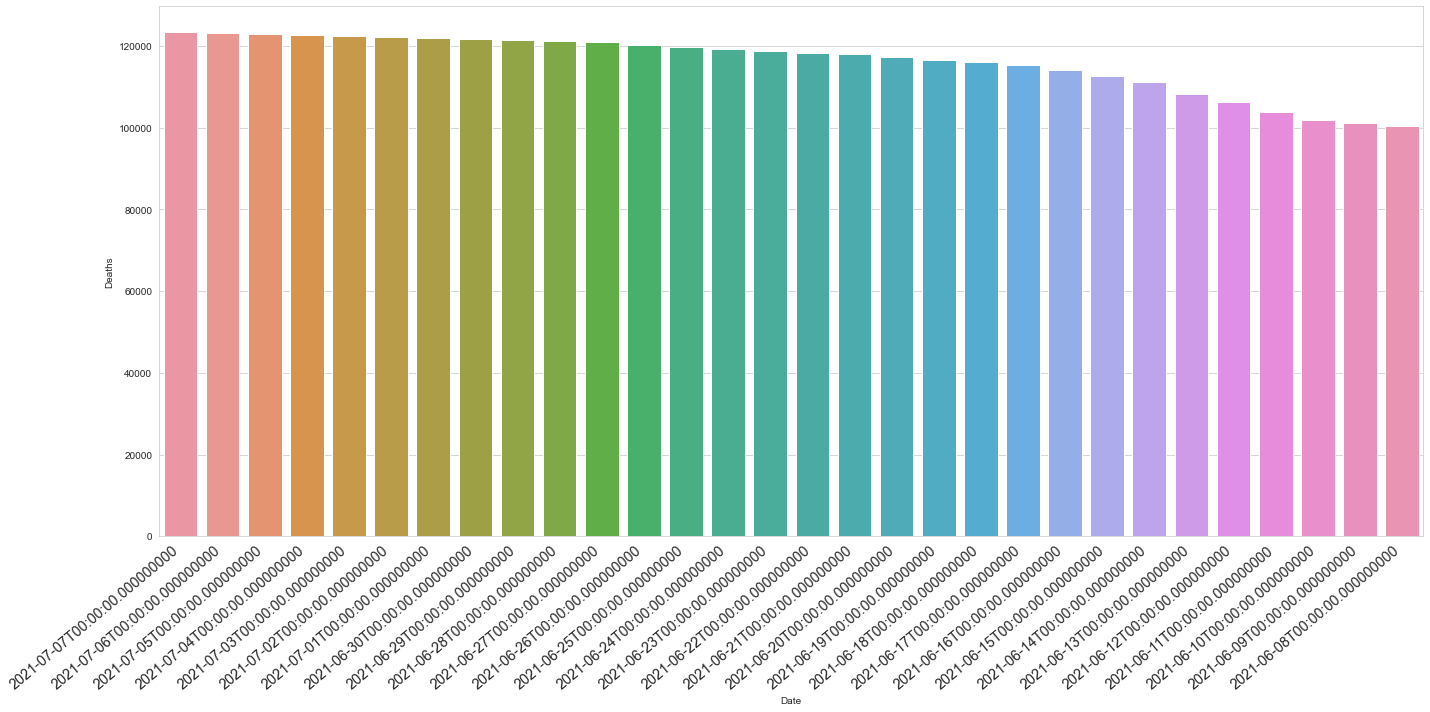

In [173]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="Date",y="Deaths",data=top_date)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

# LOWEST CURED/DEATHS/CONF- DATEWISE

In [174]:
low_date=maha.groupby("Date")[["Cured","Deaths","Confirmed"]].sum().sort_values("Deaths",ascending=True).reset_index().head(30)

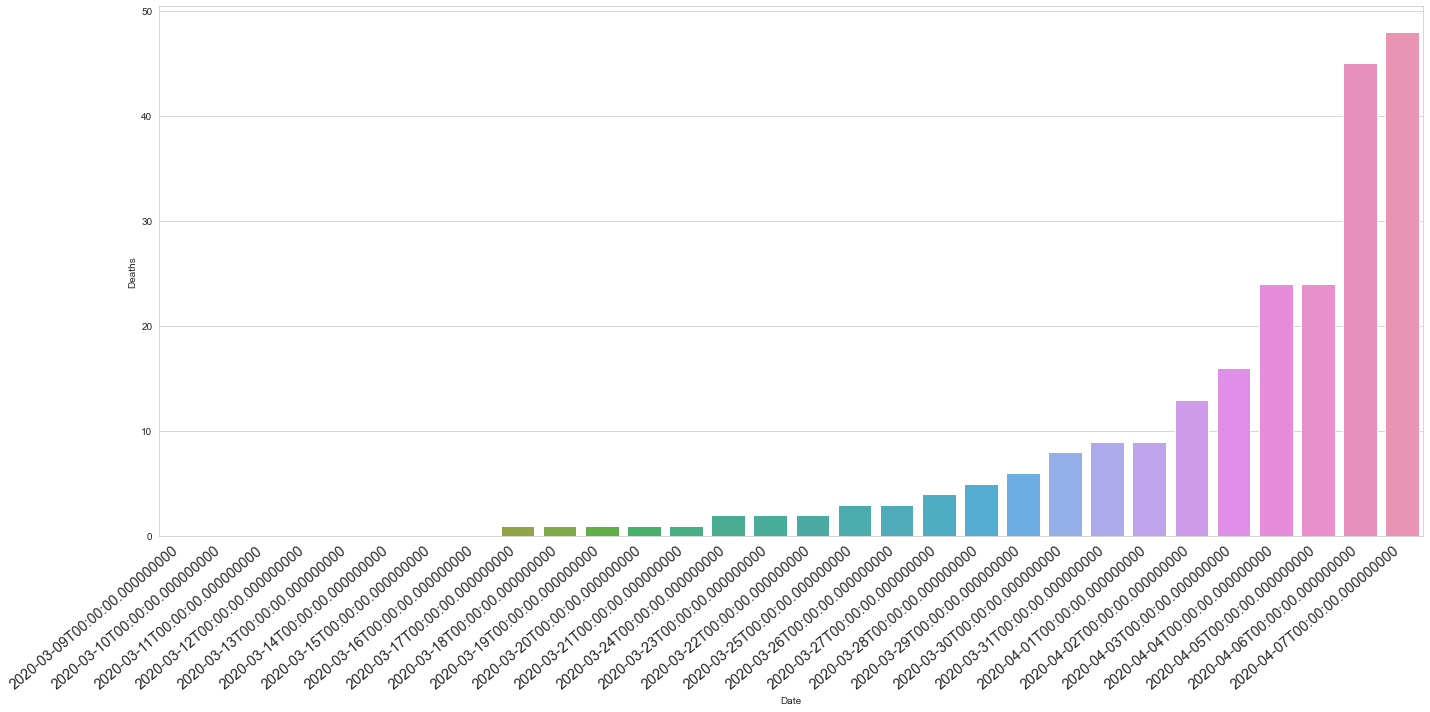

In [175]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")#whitegrid
sns.barplot(x="Date",y="Deaths",data=low_date)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()